In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option("display.max_columns", None)


# Table Of Contents

#### [1. Introduction](#Introduction)
   - [1.1 Description](#Description)
   - [1.2 Problems to Solve](#Problems_to_solve)
    
#### [2. Cleaning the Data](#Cleaning_the_data)
   - [2.1 Renaming Columns](#Renaming_columns)
   - [2.2 Deciding on the Target](#Deciding_on_the_target)
       - [2.2.1 Exploratory Visualization](#Exploratory_visualization)
   - [2.3 General Formatting](#General_formatting)
   - [2.4 Removing Columns With Only 1 Unique Value](#Removing_columns_with_only_1_unique_value)
    
#### [3. Feature Preparation](#Feature_preparation)
   - [3.1 Addressing Missing Values](#Addressing_missing_values)
   - [3.2 Converting Categorical Data to Numeric](#Converting_categorical_data_to_numeric)


<a id='Introduction'></a>

# Introduction

Data set and data set description retrieved from the UCI Machine Learning Repository can be found [here:](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications)

<a id='Description'></a>

## Description

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping).
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.


<a id='Problems_to_solve'></a>

## Problems to Solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1. the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

In [2]:
data = pd.read_csv('MI.data', index_col=None, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,180,100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.7,0,138,?,?,?,8,16,4,0,0,1,?,?,?,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,120,90,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.38,0.18,?,7.8,3,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,100,180,100,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,132,0.3,0.11,?,10.8,?,3,3,0,0,1,1,1,0,1,0,0,3,2,2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,?,?,120,70,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.9,0,146,0.75,0.37,?,?,?,2,0,0,1,?,?,?,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,160,90,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.45,0.22,?,8.3,?,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    0       int64 
 1    1       object
 2    2       int64 
 3    3       object
 4    4       object
 5    5       object
 6    6       object
 7    7       object
 8    8       object
 9    9       object
 10   10      object
 11   11      object
 12   12      object
 13   13      object
 14   14      object
 15   15      object
 16   16      object
 17   17      object
 18   18      object
 19   19      object
 20   20      object
 21   21      object
 22   22      object
 23   23      object
 24   24      object
 25   25      object
 26   26      object
 27   27      object
 28   28      object
 29   29      object
 30   30      object
 31   31      object
 32   32      object
 33   33      object
 34   34      object
 35   35      object
 36   36      object
 37   37      object
 38   38      object
 39   39      object
 40   40  

<a id='Cleaning_the_data'></a>

# Cleaning the Data

1. rename the columns
2. decide on target for modeling 
3. general formatting 
4. remove columns with only 1 unique value


<a id='Renaming_columns'></a>

## Renaming Columns

In [5]:
renamed = [
     'ID', 'Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'heredity_on_CHD', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg',
     'diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'serum_potassium_content', 'increase_of_sodium_in_serum',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'serum_CPK_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate', 'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 'myocardial_rupture', 'dressler_syndrome', 
     'chronic_heart_failure', 'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome'
]

In [6]:
new_col_names_dict = {}
for i, j in zip(data.columns, renamed):
    new_col_names_dict[i] = j


In [7]:
data = data.rename(columns = new_col_names_dict)

In [8]:
data

,ID,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,heredity_on_CHD,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,serum_CPK_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU

<a id='Deciding_on_the_target'></a>

## Deciding on the Target

Ultimately, we want to determine the likelihood of complications and outcomes for a given patient.

Columns 113 to 123 provide true or false responses for whether a given complication exists for that patient.
column 124, lethal outcome, provides 7 causes of death (and one additional category for survival). This gives us 11 complications, 7 causes of death, and 1 scenario in which the patient survives. 

Because there are 19 potential targets, we have a few options. We can:
1. predict survival vs. any cause of death, running 1 model to do so
2. predict the likelihood of any complication, running one model to do so
3. predict each specific cause of death as its own target, running 7 models to do so
4. predict each specific complication as its own target, running 11 models to do so

Options 1 and 3 deal exclusively with survival and causes of death, while options 2 and 4 deal with complications. The thrust of the obtainers of this data seems to be to use patient information to better predict complications, not just whether the patient will die. So, while interesting and potentially useful in another setting, let's eliminate options 1 and 3 for the scope of this project. 

Let's focus on number 2: predicting the likelihood of a patient experiencing any complication. This will be more broadly focused than the specific complications option, but it will likely turn up useful information nonetheless that could help guide a physician to certain care strategies over others. Additionally, we would likely need more data available to analyze the problem with the level of granularity contained in option 4. Because the most benefit will be gained by combining patient information with the prediction of any complication in their future, this will be our target for this project.  

To do this, we'll group all possible complications together as a new column in the dataframe. The training set patients will get a score based on how many complications the patient experiences, and the test set will look to accurately predict those scores. 



A secondary goal we can pursue is to determine the likelihood of 1 or more complications leading to a lethal outcome.


In [9]:
# think how to address the lethal outcome column. 
# probably should dummy column it just like the other categoricals
# do this by lethal_outcome prefix=colname

# add the dummied lethal_outcome to the full_df. make sure there are no missing values here, too. 
# ORRRRRR: just make a pivot table that shows how often the 16% of people who die also have a complication. 

data['lethal_outcome'].value_counts(normalize=True)

0    0.840588
1    0.064706
3    0.031765
6    0.015882
7    0.015882
4    0.013529
2    0.010588
5    0.007059
Name: lethal_outcome, dtype: float64

## lethal outcome pivot table

make one

In [10]:
target_columns = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina' 
    ]

In [11]:
data['target'] = 0

In [12]:
new_targets = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina', 'target'
    ]

data[new_targets].head()
# data[data[new_targets]['lethal_outcome'] == 1]

,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,target
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data['target'] = data[target_columns].sum(axis=1)

In [14]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

In [15]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

<a id='Exploratory_visualization'></a>

### Exploratory Visualization 

In [16]:
data['Sex'].value_counts()

1    1065
0     635
Name: Sex, dtype: int64

In [17]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

In [18]:
data['Sex'].count()


1700

In [19]:
# finding number of males per number of complications
complication_num_by_sex = data[['Sex', 'target']].groupby('target').sum()
complication_num_by_sex.rename(columns={'Sex': 'males'}, inplace=True)


# complication_num_by_sex['males'] = data['target'].value_counts().values - complication_num_by_sex['Sex'] 
complication_num_by_sex['females'] = data['target'].value_counts().values - complication_num_by_sex['males']

complication_num_by_sex['male_percent'] = complication_num_by_sex['males'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])
complication_num_by_sex['female_percent'] = complication_num_by_sex['females'] / (complication_num_by_sex['males'] + complication_num_by_sex['females'])

total_males_and_females = data['Sex'].value_counts()
original_male_to_female_ratio = total_males_and_females.values[0] / total_males_and_females.values[1]





# trying to account for the weight of the males compared to females 
# complication_num_by_sex['total_male_to_female_ratio'] = original_male_to_female_ratio

# cols_to_norm = ['male_percent','female_percent']
# complication_num_by_sex[cols_to_norm] = complication_num_by_sex[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# complication_num_by_sex['category_male_female_ratio'] = complication_num_by_sex['male_percent'] / complication_num_by_sex['female_percent']
# complication_num_by_sex['distance_from_total_ratio'] = original_male_to_female_ratio - (complication_num_by_sex['male_percent'] / complication_num_by_sex['female_percent'])
complication_num_by_sex


# adjusted is the distance column. 
# in category 0, there are half as many males as females
# in category 2, there are twtice. as manyy males as females 


,males,females,male_percent,female_percent
target,,,,
0,524,241,0.684967,0.315033
1,385,254,0.602504,0.397496
2,109,92,0.542289,0.457711
3,36,38,0.486486,0.513514
4,10,9,0.526316,0.473684
5,1,1,0.500000,0.500000


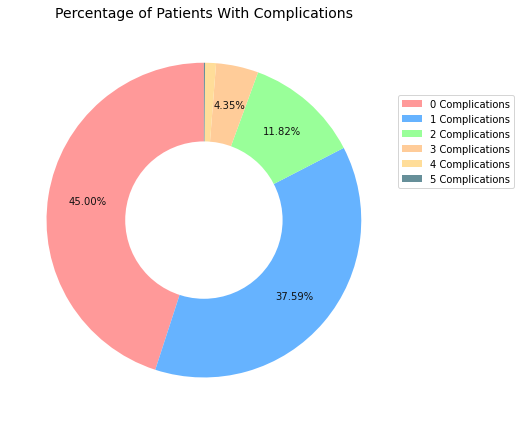

In [20]:
complication_series = data['target'].value_counts(normalize=True)
labels = complication_series.index

new_labels = []
for label in labels:
    if label <= 5:
        new_labels.append('{} {}'.format(label, 'Complications'))
    else:
        new_labels.append(label)

sizes = complication_series.values

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffdd99', '#668f99']


def autopct_modifier(limit):
    ''' Displays only values above a threshold on a given slice.
    '''
    def pie_autopct(pct):
        return ('{:.2f}%'.format(pct)) if pct > limit else ''
    return pie_autopct


fig = plt.subplots(figsize=(10, 6))

patches, texts, autotexts = plt.pie(
    sizes,
#     labels=new_labels,
    autopct=autopct_modifier(4),
    colors=colors,
    pctdistance=0.75,
    startangle=90,
    normalize=False
)

for text in texts:
    text.set_color('#333')
    
for autotext in autotexts:
    autotext.set_color('#111')
    

plt.title('Percentage of Patients With Complications', fontsize=14)
                                          
plt.legend(
        labels = new_labels, 
        loc='right', 
        bbox_to_anchor=(1.3, 0.7)
    )

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
plt.tight_layout()
plt.show()

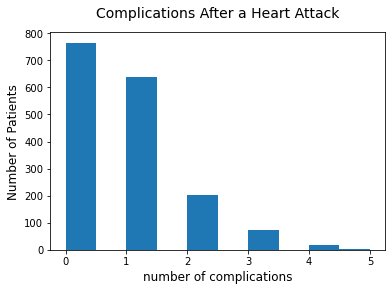

In [21]:
data['target'].plot.hist()
plt.title('Complications After a Heart Attack', y=1.04, fontsize=14)
plt.xticks(size=10)
plt.xlabel('number of complications', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


In [22]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

We see that people had anywhere from 0 to 5 unique complications following their heart attack. 

__investigate further if you want to make a comment on gender__

Patients who have 0 or 1 complications are 82% of the total, perhaps indicating that the patient is likely to die before having a chance to accumulate multiple complications. 

With this information, we'll define our goal more clearly: to predict what type, and how many complications someone is likely to have.
We'll create a model to do this. 

<a id='General_formatting'></a>

## General Formatting

There are a number of instances where the "?" symbol represents a missing value. However, "?" doesn't actually register to the programming language as missing, so it appears as if there are no missing values.

This part is pretty straight-forward; we'll convert any "?" symbol into something that will register as a missing value. We'll replace them with NaN ("Not a Number"). 

In [23]:
data.isnull().sum()

ID                                                                 0
Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
heredity_on_CHD                                                    0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions

In [24]:
# data['exertional_angina_pectoris_in_anam'].value_counts()

In [25]:
for col_name in data.columns:
    data[col_name] = data[col_name].replace('?', np.nan)

In [26]:
# data['exertional_angina_pectoris_in_anam'].value_counts(dropna=False)

In [27]:
data.isnull().sum()

ID                                                                    0
Age                                                                   8
Sex                                                                   0
num_MI_in_anam                                                        4
exertional_angina_pectoris_in_anam                                  106
functional_class_of_angina_pectoris_in_last_year                     73
CHD_in_recent_weeks                                                  51
heredity_on_CHD                                                    1628
essential_hypertension                                                9
symptomatic_hypertension                                              8
duration_of_arterial_hypertension                                   248
chronic_heart_failure_in_anam                                        54
arrhythmia_in_anam                                                   21
premature_atrial_contractions_in_anam                           

<a id='Removing_columns_with_only_1_unique_value'></a>

## Removing Columns With Only 1 Unique Value

It's good practice to disregard any columns tht only have one unique value, as those would not help us in the modeling process. We can verify easily with this relatively small number of features that there are no columns that fall in this category. Furthermore, none of the columns that have only two unique values have one of those values as NaN. We're good to move forward, knowing at this stage that these columns are all potentially useful.

In [28]:
data.nunique(dropna=False)

ID                                                                 1700
Age                                                                  63
Sex                                                                   2
num_MI_in_anam                                                        5
exertional_angina_pectoris_in_anam                                    8
functional_class_of_angina_pectoris_in_last_year                      6
CHD_in_recent_weeks                                                   4
heredity_on_CHD                                                       3
essential_hypertension                                                5
symptomatic_hypertension                                              3
duration_of_arterial_hypertension                                     9
chronic_heart_failure_in_anam                                         6
arrhythmia_in_anam                                                    3
premature_atrial_contractions_in_anam                           

<a id='Feature_preparation'></a>

# Feature Preparation 

There are three steps we should take to prepare the data for a machine learning model. 

Firstly, if there are any missing values in the dataset, the machine learning model will not be able to calculate its predictions. Therefore, we must address every single missing value in a way that is representative of the real life values that instance represents. In other words, we must remove data only where necessary, or replace a missing value with some other reasonable value. 

Secondly, for our model to work, we need to convert any categorical data into a numeric form. There are many cases in this data set where certain categories of states are labelled with numbers. For example, in the `Sex` column, instead of the word "male" or "female" appearing, females are represented by 0, and males are represented by 1. The numbers are actually in a string format, so all we have to do is convert them into integers. 

Finally, if there are any unneccesary columns, we'll remove them.  


Feature Preparation:
1. address missing values 
2. convert categorical to numeric
3. remove any other extraneous columns

<a id='Addressing_missing_values'></a>

## Addressing Missing Values
We'll use two main techniques to address missing values:
   - imputation (using the mean or median)
   - removal of rows or columns
    
We should go column by column to assess how to deal with missing values. We can look at the following parameters to help guide our decisions:
1. how many unique values are there in a column?
2. what percentage of each of the total is each unique value? (the more lopsided, generally the less useful)
3. is the column useful for a machine learning model? If not, removal is a good choice. If so, removal of rows provided not too many, may be the way to go. 


    

In [29]:
removable_cols = ['ID']

To proceed broadly at first, let's start with an assumption that if a column has at least 55% of the values not missing, we'll keep those columns. Later, we'll address the remaining columns' missing rows.

In [30]:
missing_maximum = int(len(data) * 0.45)
missing_maximum

765

In [31]:
# find the column names and add them to a list:
#that data[missings[missings.values < missing_maximum].index]

In [32]:
missings = data.isnull().sum()


df_55_plus = data[missings[missings.values < missing_maximum].index]

# droppable_cols = missings[missings.values > missing_maximum].index
# removable_cols.append(list(droppable_cols))
# removable_cols

df_55_plus.isnull().sum()


ID                                                                   0
Age                                                                  8
Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxy

In [33]:
print(df_55_plus.shape)
print(data.shape)

(1700, 121)
(1700, 125)


In [34]:
df_55_plus = df_55_plus.drop('ID', axis=1)

In [35]:
df_55_plus.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricula

We've removed 5 columns so far. 

let's look at the columns with the largest number of missing values next.

In [36]:

mask = df_55_plus.isnull().sum()
many_nulls = df_55_plus.loc[:, mask > 0].isnull().sum().sort_values(ascending=False)
print('columns to address:', len(many_nulls))
many_nulls


columns to address: 106


use_of_NSAIDs_by_emergency_cardiology_team                         686
use_of_lidocaine_by_emergency_cardiology_team                      677
use_of_opioid_drugs_by_emergency_cardiology_team                   657
increase_of_sodium_in_serum                                        375
serum_sodium_content                                               375
serum_potassium_content                                            371
hypokalemia                                                        369
serum_AsAT_content                                                 285
serum_AlAT_content                                                 284
systolic_blood_pressure_by_ICU_in_mmHg                             267
diastolic_blood_pressure_by_ICU_in_mmHg                            267
duration_of_arterial_hypertension                                  248
erythrocyte_sedimentation_rate                                     203
sinus_ECG_rhythm_at_admission_with_HR_60-90                        152
atrial

Some of these columns have a huge amount of missing values, but might be particularly useful to the algorithm. I suspect certain blood marker levels in particular could be helpful. 

If it turns out that the majority of the values that do exist for these columns are reliable, we can more confidently fill in the missing data. However, if there's a large amount of variation, we should probably discard it entirely and move on.

In [37]:
for i in many_nulls[many_nulls > 54].index:
    print(df_55_plus[i].value_counts(dropna=False))

1      701
NaN    686
0      313
Name: use_of_NSAIDs_by_emergency_cardiology_team, dtype: int64
NaN    677
0      627
1      396
Name: use_of_lidocaine_by_emergency_cardiology_team, dtype: int64
NaN    657
1      618
0      425
Name: use_of_opioid_drugs_by_emergency_cardiology_team, dtype: int64
0      1295
NaN     375
1        30
Name: increase_of_sodium_in_serum, dtype: int64
NaN    375
136    214
140    186
130    125
133     81
138     80
143     63
146     61
134     57
132     56
139     48
142     37
141     36
137     30
144     27
127     24
135     23
128     21
150     18
123     15
131     14
153     14
125     13
120     11
129     11
124     10
126     10
117      6
145      5
122      5
121      5
159      4
156      4
148      2
154      2
149      2
118      1
163      1
147      1
169      1
151      1
Name: serum_sodium_content, dtype: int64
NaN    371
4      101
3.8     91
4.2     87
3.9     79
3.5     71
4.5     62
4.1     62
4.3     60
3.6     58
4.7     57
3.7   

we have a few types of columns here. Identfying what types of columns exist can help with a systematic approach to dealing with a large number of columns with missing values.


 - some columns only have 3 unique values: 0, 1, or nan. 
 - some columns have many unique values
 - some columns are lopsided in their distribution across their values
 - some columns are widely distributed
 
 
What we really care about is, for the values that are missing, can we reasonably assume what those values might be?
Therefore, we can do the following:

- for the columns that have a lopsided distribution, we can confidently either impute the mean or remove the few instances with rare values. 
 
- for the columns with a wide/even distribution, we should discard that column entirely. 



First, let's take these 106 columns with missing information and separate them out into 2 similarly sized groups: those with more than 54 missing columns, and those with equal to or less than that. 

This is a fairly arbitrary cutoff, but it will help deal with columns that have many missing values versus only a few missing values.


### visualizing the distributions of missing value columns

In [38]:
# I figured it out. there were 2 problems. 
# 1. when creating a histogram, you don't use value_counts(). it does that automatically.
# 2. the missing values were screwing it up. it needs to have no missing values. 


In [39]:
# my goal is to plot the information from value counts to show visually what's going on. 
# after that, identify the distributions that are lopsided (decide on a cutoff) and keep those columns.
# if the column's distribution is wider than that cutoff, get rid of it. 



In [40]:
# df_55_plus['increase_of_sodium_in_serum'].value_counts(dropna=False)

In [41]:
# plt.hist(df_55_plus['increase_of_sodium_in_serum'].dropna())

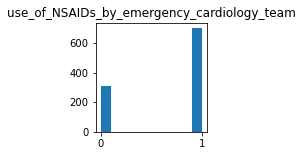

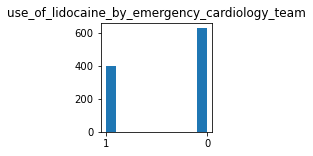

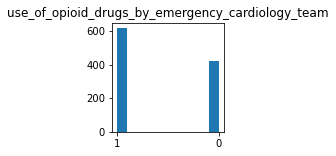

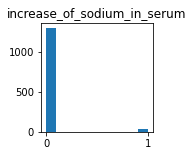

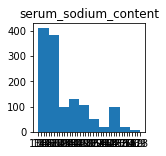

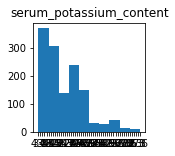

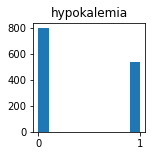

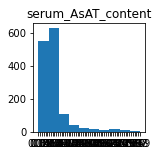

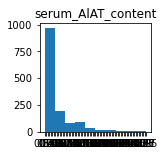

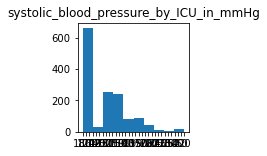

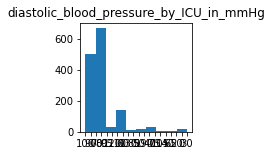

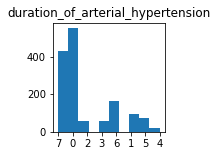

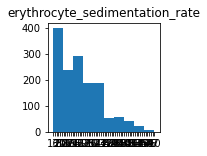

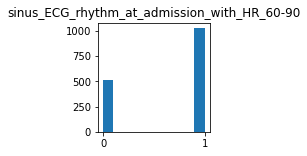

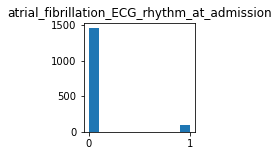

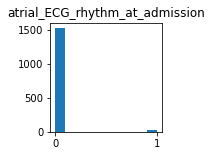

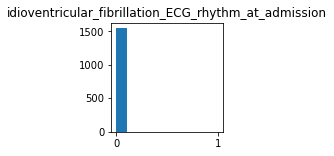

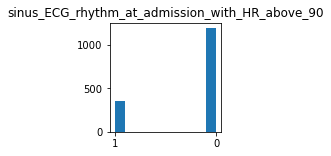

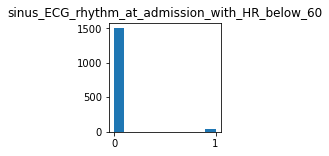

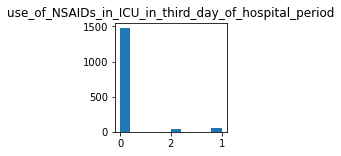

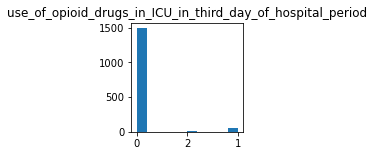

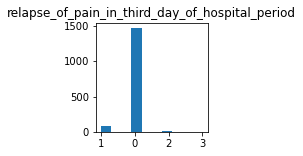

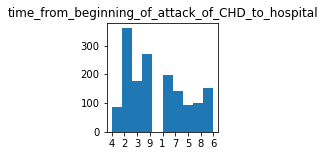

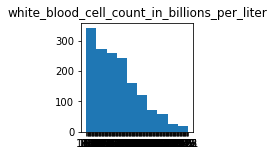

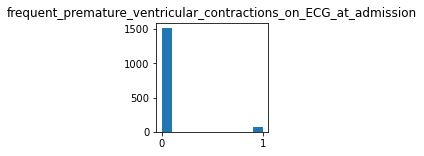

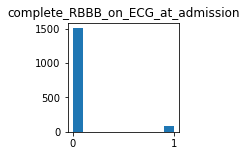

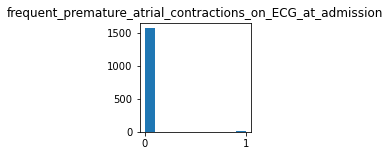

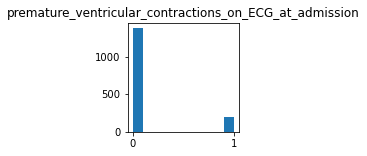

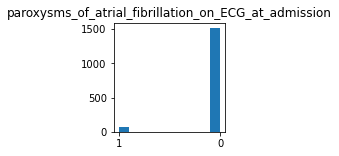

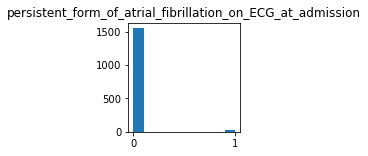

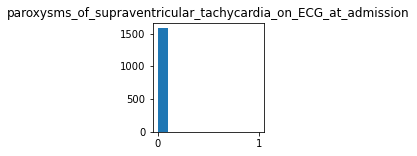

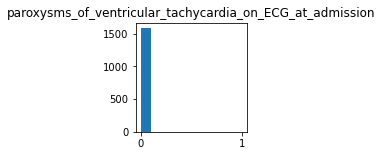

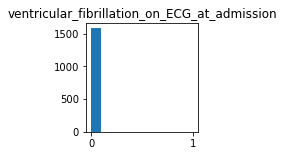

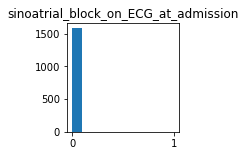

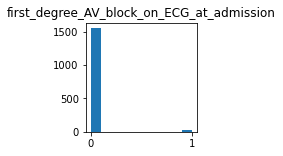

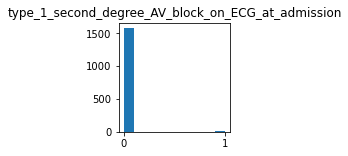

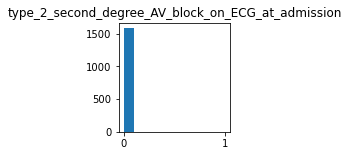

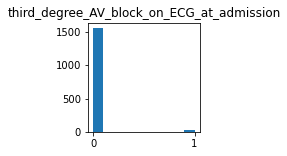

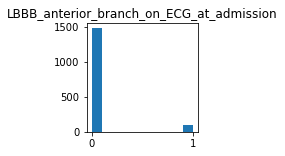

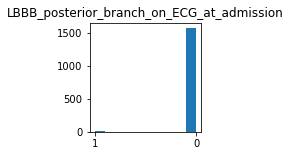

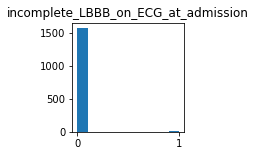

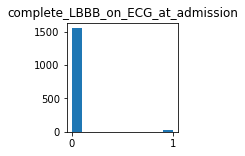

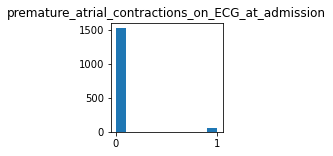

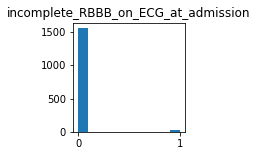

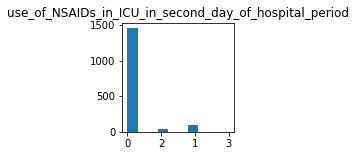

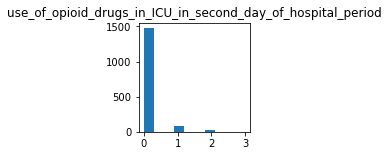

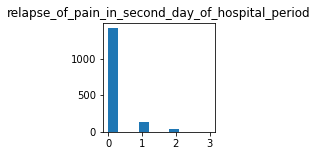

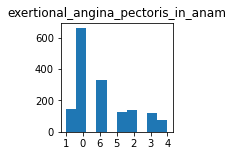

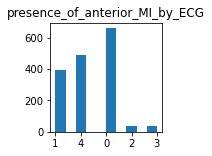

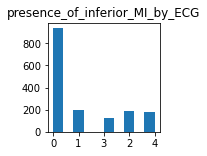

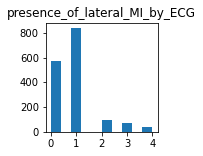

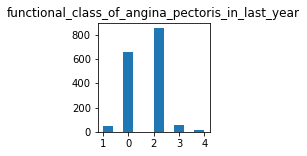

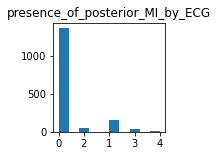

In [42]:
for i in many_nulls[many_nulls > 54].index:
    figure = plt.figure(figsize=(2, 2))
    plt.title(i)
    plt.hist(df_55_plus[i].dropna(), bins=10)
    plt.show()

In [43]:
pre_split_df = df_55_plus.copy()

In [44]:
above_54 = pre_split_df[many_nulls[many_nulls > 54].index]
above_54.columns

Index(['use_of_NSAIDs_by_emergency_cardiology_team',
       'use_of_lidocaine_by_emergency_cardiology_team',
       'use_of_opioid_drugs_by_emergency_cardiology_team',
       'increase_of_sodium_in_serum', 'serum_sodium_content',
       'serum_potassium_content', 'hypokalemia', 'serum_AsAT_content',
       'serum_AlAT_content', 'systolic_blood_pressure_by_ICU_in_mmHg',
       'diastolic_blood_pressure_by_ICU_in_mmHg',
       'duration_of_arterial_hypertension', 'erythrocyte_sedimentation_rate',
       'sinus_ECG_rhythm_at_admission_with_HR_60-90',
       'atrial_fibrillation_ECG_rhythm_at_admission',
       'atrial_ECG_rhythm_at_admission',
       'idioventricular_fibrillation_ECG_rhythm_at_admission',
       'sinus_ECG_rhythm_at_admission_with_HR_above_90',
       'sinus_ECG_rhythm_at_admission_with_HR_below_60',
       'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
       'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period',
       'relapse_of_pain_in_third_day_of_ho

In [45]:
below_54 = pre_split_df[many_nulls[many_nulls <= 54].index]
below_54.columns

Index(['chronic_heart_failure_in_anam', 'CHD_in_recent_weeks',
       'premature_ventricular_contractions_in_anam',
       'ventricular_paaroxysmal_tachycardia_in_anam',
       'ventricular_fibrillation_in_anam',
       'premature_atrial_contractions_in_anam',
       'persistent_form_of_atrial_fibrillation_in_anam',
       'paroxysms_of_atrial_fibrillation_in_anam', 'arrhythmia_in_anam',
       'first_degree_AV_block_in_anam', 'third_degree_AV_block_in_anam',
       'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam',
       'complete_LBBB_in_anam', 'complete_RBBB_in_anam',
       'incomplete_RBBB_in_anam', 'use_of_heparin_in_ICU',
       'use_of_acetylsalicylic_acid_in_ICU', 'use_of_ticlid_in_ICU',
       'relapse_of_pain_in_first_hours_of_hospital_period',
       'use_of_trental_in_ICU', 'cardiogenic_shock_at_admission_to_ICU',
       'paroxysms_of_atrial_fibrillation_at_admission_to_ICU',
       'use_of_calcium_channel_blockers_in_ICU',
       'paroxysms_of_supraventricular_techycard

In [46]:
print(above_54.shape)
print(below_54.shape)
# the fact that there are 53 columns is a bit of a coincidence
# we had 106 to start with and the cutoff just happened to be 53. 

(1700, 53)
(1700, 53)


now I have two dfs of missing values, one with more than 54 per column, and one with 54 or less per column.

we'll focus first on the more than 54 per column, the above_54 df. 

### above_54 df

let's drop any column where the nan is greater than 25% of the values. 

In [47]:
# clean_missing_df = df_55_plus.copy()

In [48]:
1700 * 0.25

425.0

In [49]:
many_missing = above_54.isnull().sum()

so_clean = above_54[many_missing[many_missing > len(df_55_plus) * 0.25].index]
so_clean.columns


Index(['use_of_NSAIDs_by_emergency_cardiology_team',
       'use_of_lidocaine_by_emergency_cardiology_team',
       'use_of_opioid_drugs_by_emergency_cardiology_team'],
      dtype='object')

In [50]:
above_54 = above_54.drop(columns=so_clean.columns, axis=1)
above_54.isnull().sum().sort_values(ascending=False)
                                                   

increase_of_sodium_in_serum                                        375
serum_sodium_content                                               375
serum_potassium_content                                            371
hypokalemia                                                        369
serum_AsAT_content                                                 285
serum_AlAT_content                                                 284
systolic_blood_pressure_by_ICU_in_mmHg                             267
diastolic_blood_pressure_by_ICU_in_mmHg                            267
duration_of_arterial_hypertension                                  248
erythrocyte_sedimentation_rate                                     203
idioventricular_fibrillation_ECG_rhythm_at_admission               152
sinus_ECG_rhythm_at_admission_with_HR_above_90                     152
sinus_ECG_rhythm_at_admission_with_HR_below_60                     152
atrial_ECG_rhythm_at_admission                                     152
sinus_

In [51]:
above_54['serum_sodium_content'].describe()

count     1325
unique      40
top        136
freq       214
Name: serum_sodium_content, dtype: object

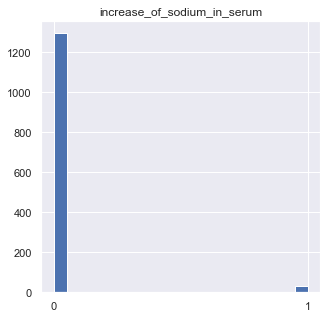

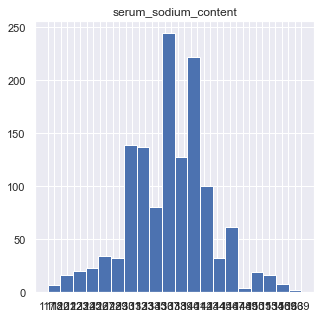

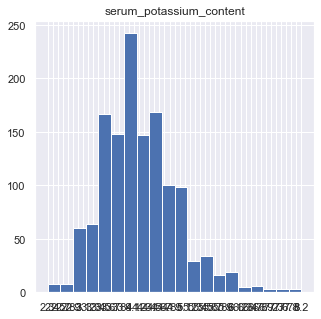

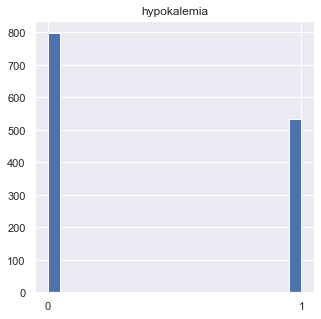

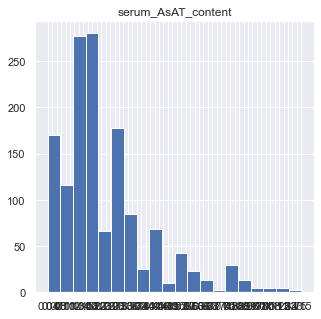

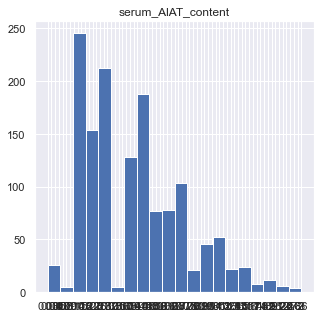

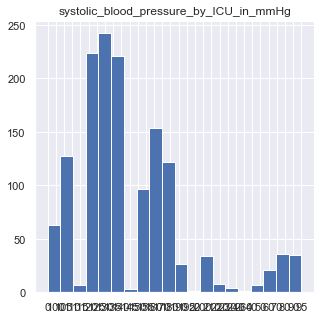

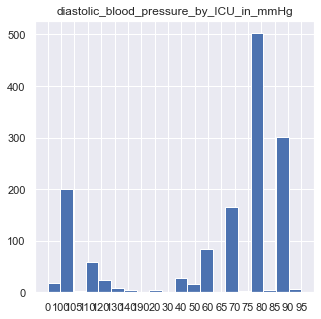

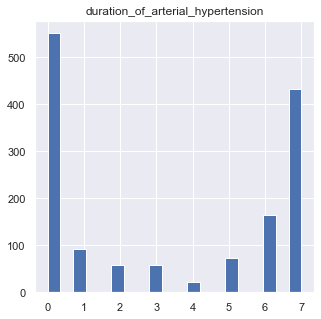

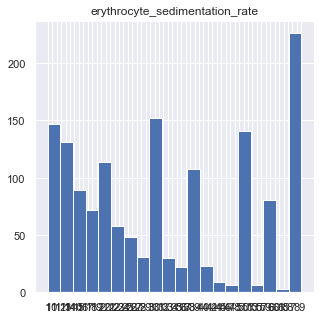

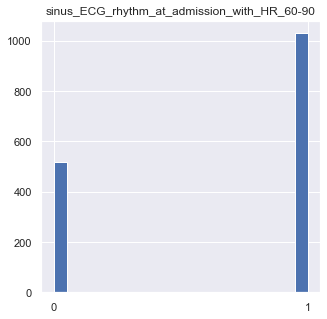

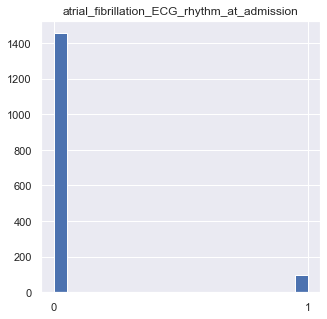

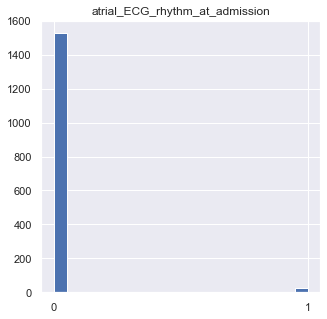

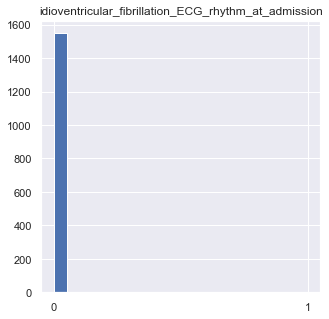

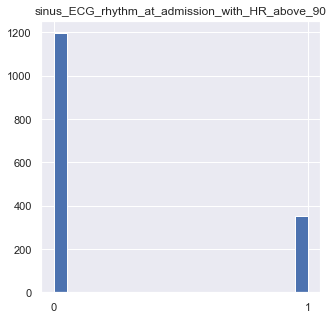

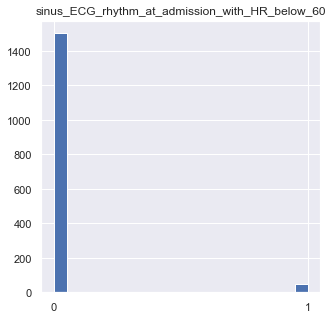

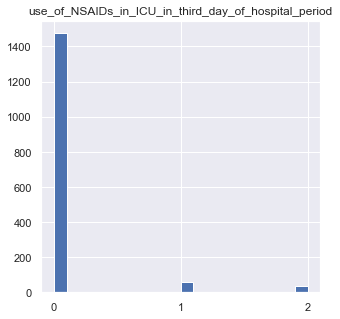

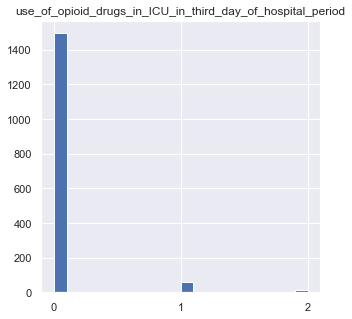

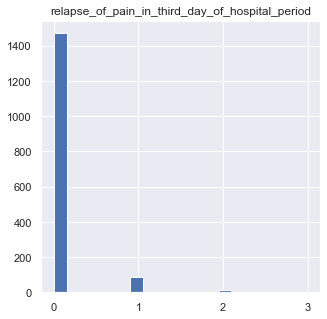

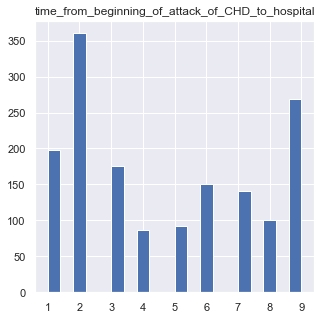

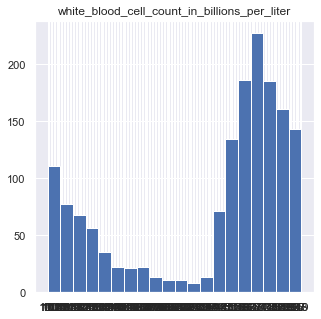

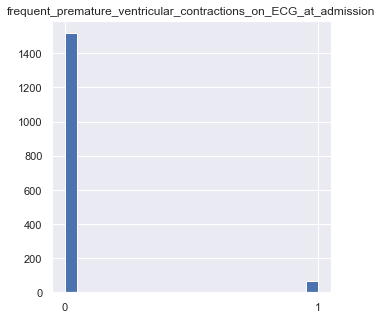

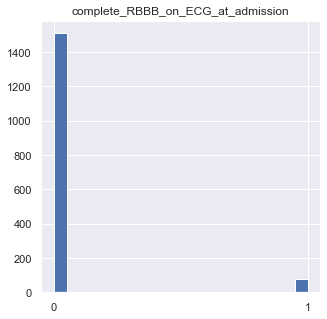

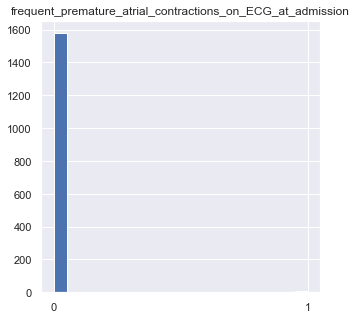

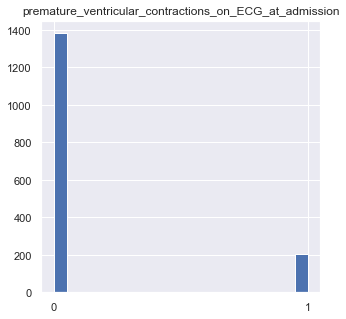

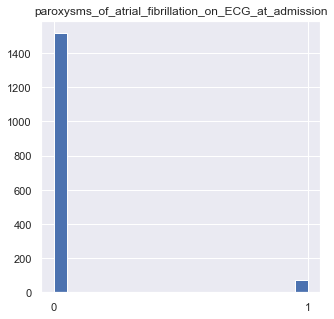

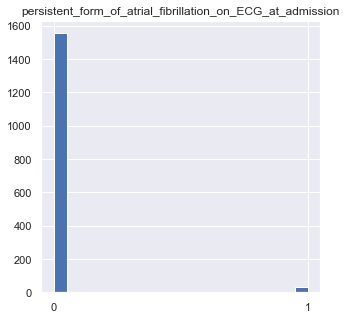

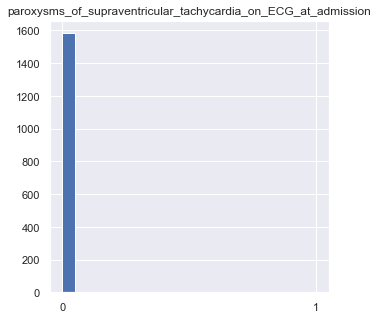

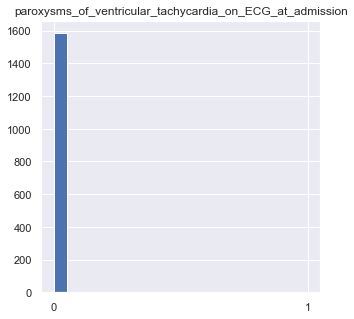

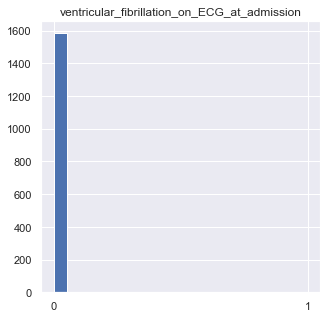

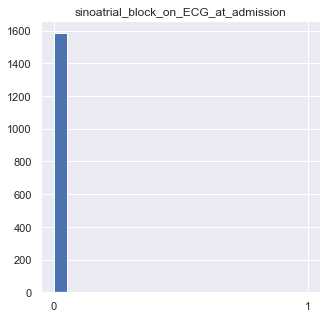

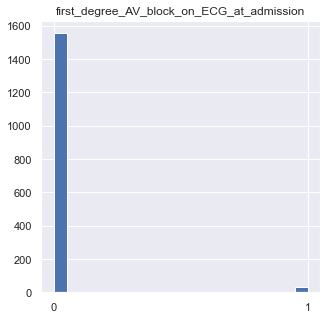

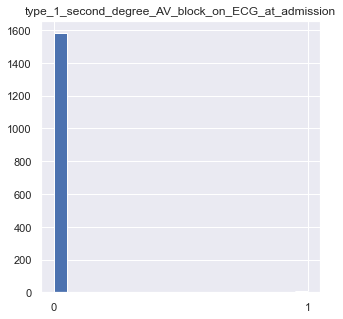

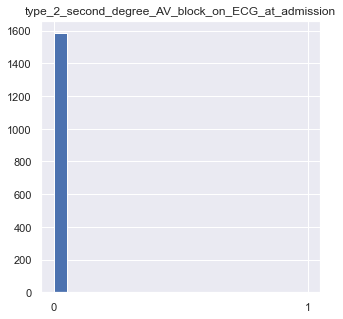

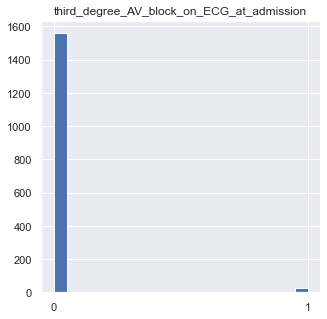

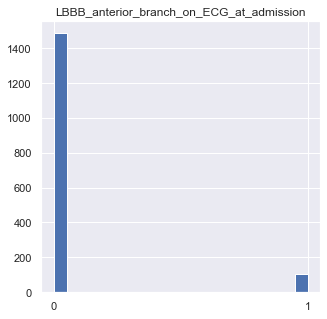

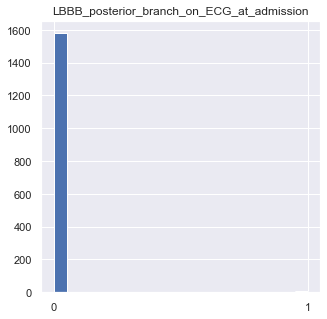

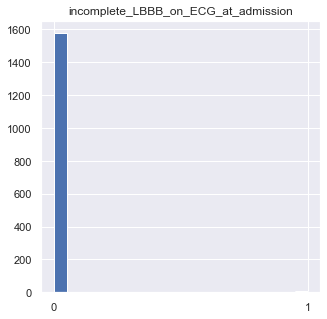

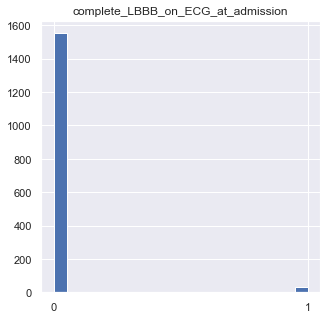

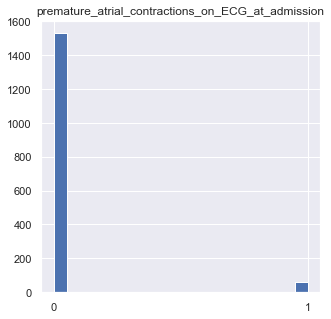

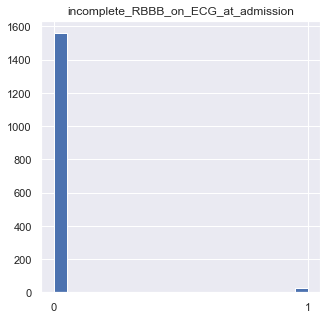

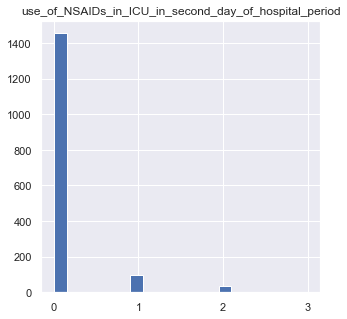

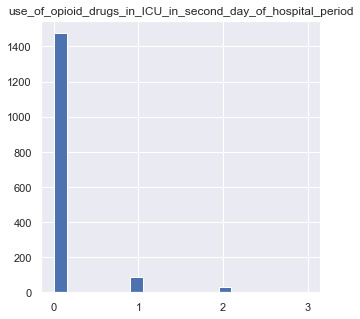

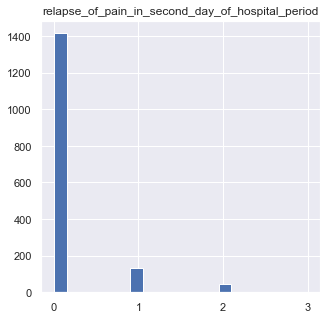

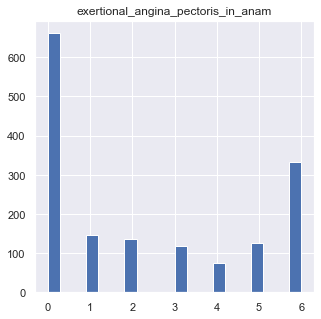

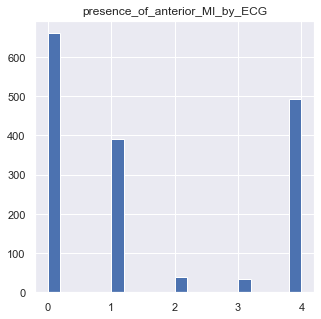

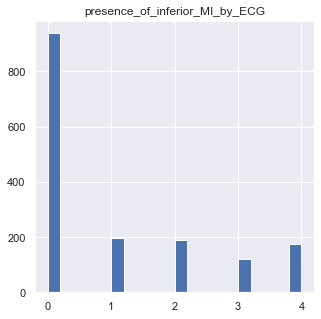

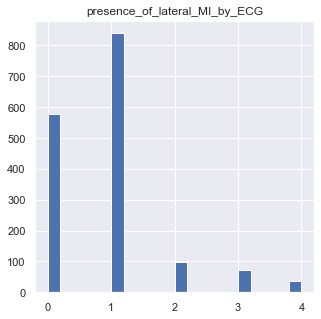

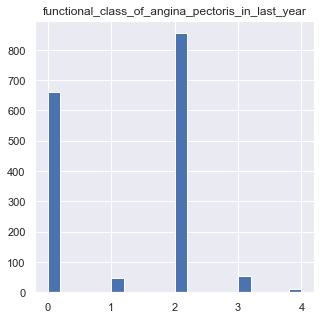

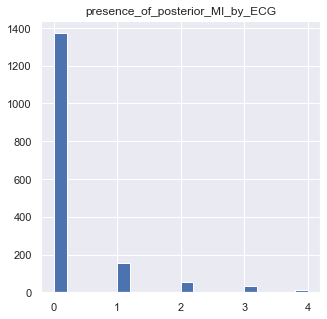

In [152]:
for i in above_54.columns:
    figure = plt.figure(figsize=[5,5])
    plt.title(i)
    plt.hist(above_54[i].dropna().sort_values(), bins=20)
    plt.show()

### below_54 df

In [53]:
# we'll come back to this after the above_54 columns are dealt with. 

# for i in many_nulls[many_nulls <= 54].index:
#     figure = plt.figure(figsize=(2, 2))
#     plt.title(i)
#     plt.hist(df_55_plus[i].dropna(), bins=10)
#     plt.show()

Here's the plan: eliminate all missing values responsibly. The resulting dataset will then take the place of df_55_plus in the first cell of the personal experimentation section. 

## a new try

start here by determining what is the cutoff of lopsided distribution vs wide distribution
if 80% or more values fall within 2 unique values, it is lopsided.

understand the dropna(thresh) parameter better 


1. do we need the missing data to accomplish our goal? 
    - yes
2. How will replacing or removing the missing data affect our analysis?
    - what percentage of the data is missing?
    - will dropping missing values cause us to lose valuable information in other columns?
    - can we identify any patterns in the missing data?


In [54]:
new_df = df_55_plus.copy()

In [55]:
new_df.count()

Age                                                                1692
Sex                                                                1700
num_MI_in_anam                                                     1696
exertional_angina_pectoris_in_anam                                 1594
functional_class_of_angina_pectoris_in_last_year                   1627
CHD_in_recent_weeks                                                1649
essential_hypertension                                             1691
symptomatic_hypertension                                           1692
duration_of_arterial_hypertension                                  1452
chronic_heart_failure_in_anam                                      1646
arrhythmia_in_anam                                                 1679
premature_atrial_contractions_in_anam                              1679
premature_ventricular_contractions_in_anam                         1679
paroxysms_of_atrial_fibrillation_in_anam                        

In [56]:
pct_missing = 1 - new_df.count() / len(new_df)
pct_missing.sort_values(ascending=False)

use_of_NSAIDs_by_emergency_cardiology_team                         0.403529
use_of_lidocaine_by_emergency_cardiology_team                      0.398235
use_of_opioid_drugs_by_emergency_cardiology_team                   0.386471
serum_sodium_content                                               0.220588
increase_of_sodium_in_serum                                        0.220588
serum_potassium_content                                            0.218235
hypokalemia                                                        0.217059
serum_AsAT_content                                                 0.167647
serum_AlAT_content                                                 0.167059
diastolic_blood_pressure_by_ICU_in_mmHg                            0.157059
systolic_blood_pressure_by_ICU_in_mmHg                             0.157059
duration_of_arterial_hypertension                                  0.145882
erythrocyte_sedimentation_rate                                     0.119412
sinus_ECG_rh

we see the majority of columns with missing values are only missing less than 10%. 

There are 13 columns that are missing more than 10%.


## visualizing missing data with seaborn

a rough way to deal with this is simply to remove all columns where they're missing 10% or more of the data, and then eliminate/impute whatever rows are missing data after that.

This would cut down on the loss of valuable data in column B if column A is the one with the missing value.



In [57]:
import seaborn as sns

In [58]:
# sort = new_df.sort_values(['target'])
# sns.set(rc={'figure.figsize':(18, 12)})
# sns.heatmap(sort.isnull(), cbar=False)

In [59]:
new_df['duration_of_arterial_hypertension'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

0      0.324118
7      0.254118
NaN    0.145882
6      0.097059
1      0.054706
5      0.042941
2      0.034118
3      0.034118
4      0.012941
Name: duration_of_arterial_hypertension, dtype: float64

In [60]:
new_df['use_of_NSAIDs_by_emergency_cardiology_team'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

1      0.412353
NaN    0.403529
0      0.184118
Name: use_of_NSAIDs_by_emergency_cardiology_team, dtype: float64

<AxesSubplot:>

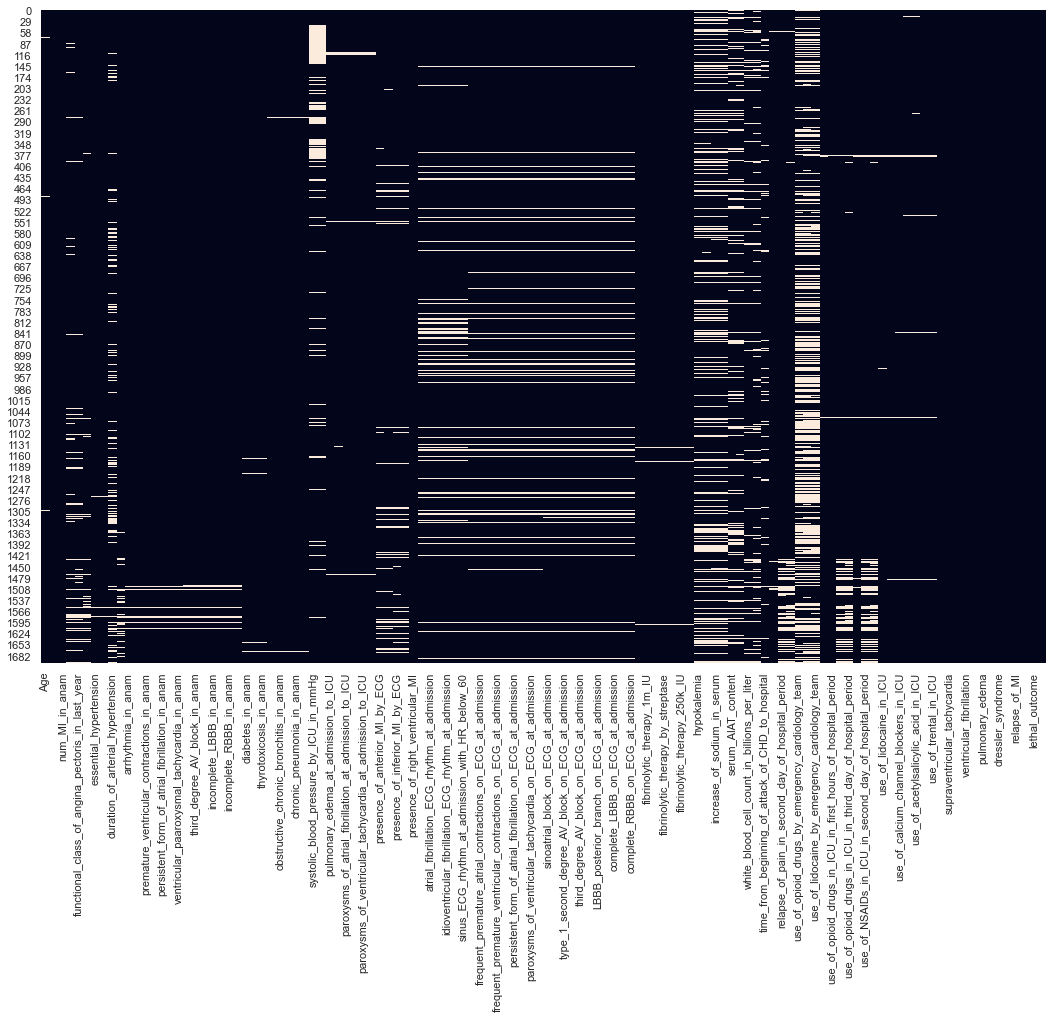

In [145]:
# sort = new_df.sort_values()
sns.set(rc={'figure.figsize':(18, 12)})
sns.heatmap(new_df.isnull(), cbar=False)

# Here's what to do 

1. We'll eliminate the three columns with more than 22% of the values missing, because they're not terribly important.
2. We'll look to impute with either the mode or the mean, depending on if the values are categorical or real. 

### 1. eliminate!

In [147]:
clean_new_df = new_df.copy()

In [148]:
clean_new_df = clean_new_df.dropna(thresh=1100, axis=1)

### 2. impute!

In [ ]:
# if unique values > 9: 
# fillna with the mean
# else: 
# fillna with the mode

In [155]:
clean_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 117 entries, Age to target
dtypes: int64(14), object(103)
memory usage: 1.5+ MB


In [166]:
text_columns = clean_new_df.select_dtypes(include=['object'])
# text_columns is a df

,Age,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU
0,77,2,1,1,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.7,0,138,NaN,NaN,8,16,4,0,0,1,0,0,0,0

In [ ]:
# should I fill the missing values proportionally across the existing values? 
# https://stackoverflow.com/questions/66465894/fill-missing-data-with-random-values-from-categorical-column-python

# or should I just use the most common existing value? 


# I'm suspicious that by using simply the mean to impute the missing values, 
# the resulting data will be biased heading into the modelling process, especially for important features.
# look into multiple imputation. 
# https://www.theanalysisfactor.com/missing-data-two-recommended-solutions/


# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
# https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505

In [170]:
clean_new_df['CHD_in_recent_weeks'].value_counts(dropna=False)

2      683
1      548
0      418
NaN     51
Name: CHD_in_recent_weeks, dtype: int64

In [168]:
# this imputes with only the most common existing value
text_columns = text_columns.apply(lambda x: x.fillna(x.value_counts().index[0]))

text_columns.isnull().sum()

Age                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions_in_anam                         0
paroxysms_of_atrial_fibrillation_in_anam                           0
persistent_form_of_atrial_fibrillation_in_anam                     0
ventricular_fibrillation_in_anam  

In [165]:
text_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 103 entries, Age to use_of_trental_in_ICU
dtypes: object(103)
memory usage: 1.3+ MB


In [176]:
pct_missing_new = 1 - text_columns.count() / len(text_columns)
pct_missing_new.sort_values(ascending=False)

Age                                                                0.0
LBBB_posterior_branch_on_ECG_at_admission                          0.0
fibrinolytic_therapy_250k_IU                                       0.0
fibrinolytic_therapy_500k_IU                                       0.0
fibrinolytic_therapy_by_streptase                                  0.0
fibrinolytic_therapy_3m_IU                                         0.0
fibrinolytic_therapy_1m_IU                                         0.0
fibrinolytic_therapy_750k_IU                                       0.0
complete_RBBB_on_ECG_at_admission                                  0.0
incomplete_RBBB_on_ECG_at_admission                                0.0
complete_LBBB_on_ECG_at_admission                                  0.0
incomplete_LBBB_on_ECG_at_admission                                0.0
LBBB_anterior_branch_on_ECG_at_admission                           0.0
hypokalemia                                                        0.0
third_

## iterative imputation

In [ ]:
# now try imputing with the multiple imputation method 

In [177]:
imputed_df = new_df.copy()

In [193]:
imputed_df.columns

Index(['Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam',
       'functional_class_of_angina_pectoris_in_last_year',
       'CHD_in_recent_weeks', 'essential_hypertension',
       'symptomatic_hypertension', 'duration_of_arterial_hypertension',
       'chronic_heart_failure_in_anam',
       ...
       'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema',
       'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure',
       'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome', 'target'],
      dtype='object', length=120)

In [203]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_df_2 = new_df.copy()

ii_imp = IterativeImputer(random_state=1)
imputed_df_2.loc[:, :] = ii_imp.fit_transform(imputed_df_2)


# diabetes_ii_imputed = diabetes.copy(deep=True)

# # Init
# ii_imp = IterativeImputer(
#     estimator=ExtraTreesRegressor(), max_iter=10, random_state=1121218
# )

# # Tranform
# diabetes_ii_imputed.loc[:, :] = ii_imp.fit_transform(diabetes_ii_imputed)

# >>> diabetes_ii_imputed.isnull().sum()

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [204]:
imputed_df_2.isnull().sum()

Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions_in_anam                         0
paroxysms_of_atrial_fibrillation_in_anam                           0
persistent_form_of_atrial_fibrilla

The iterative imputer method addressed every single missing value, as advertised. 

However, instead of classifying between one of the 7 possible options, it gave floats for a whole bunch of new unique values. given that these are categorical features, how do we use the iterative imputer to match existing options of categories? 

In [205]:
imputed_df_2['duration_of_arterial_hypertension'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

 0.000000    0.324118
 7.000000    0.254118
 6.000000    0.097059
 1.000000    0.054706
 5.000000    0.042941
 3.000000    0.034118
 2.000000    0.034118
 4.000000    0.012941
 5.235551    0.000588
 3.578240    0.000588
 5.520055    0.000588
 4.421796    0.000588
 4.896496    0.000588
 7.529188    0.000588
 4.383984    0.000588
 5.031992    0.000588
 3.823479    0.000588
 4.595560    0.000588
 4.803171    0.000588
 4.418989    0.000588
 4.313596    0.000588
 4.517239    0.000588
 4.699599    0.000588
 4.781541    0.000588
 4.973096    0.000588
 5.490155    0.000588
 3.935350    0.000588
 5.878394    0.000588
 6.909570    0.000588
 3.587650    0.000588
 5.339129    0.000588
 4.342186    0.000588
 7.021994    0.000588
 4.198427    0.000588
 5.857611    0.000588
 3.883073    0.000588
 4.519448    0.000588
 4.528748    0.000588
 6.282562    0.000588
 5.449741    0.000588
 4.703513    0.000588
 4.193501    0.000588
 4.663807    0.000588
 4.570079    0.000588
 5.237911    0.000588
 5.110347 

## personal experimentation 

I want to see how this shit lines up if there are no missing values.

To do this, we need to go through feature preparation.

1. we'll drop all missing rows 
2. isolate the categorical columns
3. separate a given column into bins if its number of unique values is significant
4. create dummy columns for each bin 
5. create dummy columns for the remaining original columns
 - 5.1 consider reshaping features that have a lopsided distribution (ex: 340 of 0 to 11 of 1)

6. combine the two sets of dummy columns into one df
7. determine correlations to the target from the now-prepared df
8. identify features to use for a model
9. run the damn model


### 1.  we'll drop all missing rows

In [63]:
df_no_nan = df_55_plus

In [64]:
df_no_nan.dropna(inplace=True)

In [65]:
df_no_nan.shape

(351, 120)

In [66]:
df_no_nan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1 to 1694
Data columns (total 120 columns):
 #    Column                                                           Dtype 
---   ------                                                           ----- 
 0    Age                                                              object
 1    Sex                                                              int64 
 2    num_MI_in_anam                                                   object
 3    exertional_angina_pectoris_in_anam                               object
 4    functional_class_of_angina_pectoris_in_last_year                 object
 5    CHD_in_recent_weeks                                              object
 6    essential_hypertension                                           object
 7    symptomatic_hypertension                                         object
 8    duration_of_arterial_hypertension                                object
 9    chronic_heart_failure_in_anam

In [67]:
df_no_nan.columns

Index(['Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam',
       'functional_class_of_angina_pectoris_in_last_year',
       'CHD_in_recent_weeks', 'essential_hypertension',
       'symptomatic_hypertension', 'duration_of_arterial_hypertension',
       'chronic_heart_failure_in_anam',
       ...
       'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema',
       'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure',
       'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome', 'target'],
      dtype='object', length=120)

### 2. isolate the categorical columns

In [68]:
text_cols = df_no_nan.select_dtypes(include=['object'])
# text_cols

for col in text_cols:
    df_no_nan[col] = df_no_nan[col].astype('category')


In [69]:
def process_age(df):
    df['Age'] = df['Age'].astype(int)
    df['Age'] = df['Age'].fillna(-0.5)
    cut_points = [-1, 0, 40, 52, 65, 79, 93]
    cut_labels = ['missing', '0-40', '40-52', '52-65', '65-79', '79-93']
    df['Age_category'] = pd.cut(df['Age'], cut_points, labels=cut_labels)
    return df

In [70]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies], axis=1)
    del df[column_name]
    return df

In [71]:
def generic_cuts(df, column_name):
    df[column_name + ' category'] = pd.cut(df[column_name], bins=5)
    # delete the old, non-categorized columns
    del df[column_name]
    return df

In [72]:
# the function we'll use to bin categorical data 
# (equally, according to size of the bin, not the numeric value of the data)

def generic_q_cuts(df, column_name):
    df[column_name + ' category'] = pd.qcut(df[column_name], 5, duplicates='drop')
    # delete the old, non-categorized columns
    del df[column_name]
    return df

In [73]:
for col in text_cols:
    text_cols[col]= text_cols[col].astype(float)

<ipython-input-73-8a2db39f029b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cols[col]= text_cols[col].astype(float)


In [74]:
text_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1 to 1694
Columns: 106 entries, Age to use_of_trental_in_ICU
dtypes: float64(106)
memory usage: 293.4 KB


In [75]:
text_cols.head()

,Age,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU
1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### 3. separate a given column into bins if its number of unique values is significant

In [76]:
# Finding the number of unique values for each category column

num_unique = text_cols.apply(lambda col: len(col.value_counts())).sort_values(ascending=False)
num_unique

white_blood_cell_count_in_billions_per_liter                       113
Age                                                                 55
erythrocyte_sedimentation_rate                                      43
serum_AlAT_content                                                  43
serum_potassium_content                                             41
serum_sodium_content                                                34
serum_AsAT_content                                                  33
systolic_blood_pressure_by_ICU_in_mmHg                              23
diastolic_blood_pressure_by_ICU_in_mmHg                             12
time_from_beginning_of_attack_of_CHD_to_hospital                     9
duration_of_arterial_hypertension                                    8
exertional_angina_pectoris_in_anam                                   7
presence_of_anterior_MI_by_ECG                                       5
presence_of_lateral_MI_by_ECG                                        5
presen

In [77]:
# creating a list of column names with at least 9 unique values to apply binning to. 

unique_9 = num_unique[num_unique.values >= 9].index
standard = num_unique[num_unique.values < 9].index
unique_9

Index(['white_blood_cell_count_in_billions_per_liter', 'Age',
       'erythrocyte_sedimentation_rate', 'serum_AlAT_content',
       'serum_potassium_content', 'serum_sodium_content', 'serum_AsAT_content',
       'systolic_blood_pressure_by_ICU_in_mmHg',
       'diastolic_blood_pressure_by_ICU_in_mmHg',
       'time_from_beginning_of_attack_of_CHD_to_hospital'],
      dtype='object')

In [78]:
standard

Index(['duration_of_arterial_hypertension',
       'exertional_angina_pectoris_in_anam', 'presence_of_anterior_MI_by_ECG',
       'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG',
       'presence_of_posterior_MI_by_ECG',
       'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period',
       'chronic_heart_failure_in_anam',
       'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
       'functional_class_of_angina_pectoris_in_last_year',
       'relapse_of_pain_in_first_hours_of_hospital_period',
       'essential_hypertension', 'num_MI_in_anam',
       'relapse_of_pain_in_second_day_of_hospital_period',
       'CHD_in_recent_weeks',
       'relapse_of_pain_in_third_day_of_hospital_period',
       'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
       'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period',
       'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period',
       'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period',
  

In [79]:
# making a df of just the unique 9 columns

unique_9_df = pd.DataFrame()

for col in text_cols.columns:
    if col in unique_9:
        unique_9_df = pd.concat([unique_9_df, text_cols[col]], axis=1)
        
unique_9_df.head()

,Age,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,serum_potassium_content,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital
1,55.0,120.0,90.0,3.5,132.0,0.38,0.18,7.8,3.0,2.0
10,71.0,140.0,90.0,3.1,132.0,0.15,0.45,9.1,5.0,1.0
11,50.0,130.0,80.0,4.1,140.0,1.13,0.60,9.6,18.0,2.0
13,57.0,125.0,80.0,3.4,132.0,1.05,0.37,5.0,27.0,2.0
14,55.0,160.0,100.0,3.5,140.0,0.45,0.15,6.7,10.0,5.0


In [80]:
# transforming into binned df

for col in unique_9_df:
    unique_9_df_qcut = generic_q_cuts(unique_9_df, col)
unique_9_df_qcut.head()


,Age category,systolic_blood_pressure_by_ICU_in_mmHg category,diastolic_blood_pressure_by_ICU_in_mmHg category,serum_potassium_content category,serum_sodium_content category,serum_AlAT_content category,serum_AsAT_content category,white_blood_cell_count_in_billions_per_liter category,erythrocyte_sedimentation_rate category,time_from_beginning_of_attack_of_CHD_to_hospital category
1,"(51.0, 60.0]","(69.999, 120.0]","(80.0, 90.0]","(2.299, 3.5]","(130.0, 134.0]","(0.3, 0.45]","(0.11, 0.18]","(7.3, 8.6]","(1.999, 5.0]","(0.999, 2.0]"
10,"(70.0, 92.0]","(130.0, 140.0]","(80.0, 90.0]","(2.299, 3.5]","(130.0, 134.0]","(0.049, 0.15]","(0.37, 2.15]","(8.6, 10.7]","(1.999, 5.0]","(0.999, 2.0]"
11,"(29.999, 51.0]","(120.0, 130.0]","(39.999, 80.0]","(3.9, 4.2]","(138.0, 140.0]","(0.75, 2.86]","(0.37, 2.15]","(8.6, 10.7]","(12.0, 20.0]","(0.999, 2.0]"
13,"(51.0, 60.0]","(120.0, 130.0]","(39.999, 80.0]","(2.299, 3.5]","(130.0, 134.0]","(0.75, 2.86]","(0.22, 0.37]","(1.999, 5.9]","(20.0, 140.0]","(0.999, 2.0]"
14,"(51.0, 60.0]","(140.0, 160.0]","(90.0, 130.0]","(2.299, 3.5]","(138.0, 140.0]","(0.3, 0.45]","(0.11, 0.18]","(5.9, 7.3]","(8.0, 12.0]","(2.0, 5.0]"


In [81]:
# confirming that the bins are roughly of equal size 

for col in unique_9_df_qcut:
    print(unique_9_df_qcut[col].value_counts())
    

(60.0, 64.0]      83
(51.0, 60.0]      73
(29.999, 51.0]    71
(70.0, 92.0]      67
(64.0, 70.0]      57
Name: Age category, dtype: int64
(69.999, 120.0]    126
(120.0, 130.0]      67
(140.0, 160.0]      58
(130.0, 140.0]      54
(160.0, 240.0]      46
Name: systolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(39.999, 80.0]    200
(80.0, 90.0]       85
(90.0, 130.0]      66
Name: diastolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(3.5, 3.9]      90
(2.299, 3.5]    79
(4.7, 8.2]      66
(4.2, 4.7]      64
(3.9, 4.2]      52
Name: serum_potassium_content category, dtype: int64
(134.0, 138.0]      94
(116.999, 130.0]    77
(130.0, 134.0]      66
(140.0, 159.0]      62
(138.0, 140.0]      52
Name: serum_sodium_content category, dtype: int64
(0.15, 0.3]      84
(0.3, 0.45]      81
(0.049, 0.15]    71
(0.45, 0.75]     64
(0.75, 2.86]     51
Name: serum_AlAT_content category, dtype: int64
(0.11, 0.18]     92
(0.22, 0.37]     77
(0.039, 0.11]    76
(0.37, 2.15]     61
(0.

### 4. create dummy columns for each bin 


In [82]:
# taking the categorized, binned df and getting dummies for all columns

hopeful_df = pd.get_dummies(unique_9_df_qcut)

hopeful_df.head()


,"Age category_(29.999, 51.0]","Age category_(51.0, 60.0]","Age category_(60.0, 64.0]","Age category_(64.0, 70.0]","Age category_(70.0, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(160.0, 240.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(80.0, 90.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(90.0, 130.0]","serum_potassium_content category_(2.299, 3.5]","serum_potassium_content category_(3.5, 3.9]","serum_potassium_content category_(3.9, 4.2]","serum_potassium_content category_(4.2, 4.7]","serum_potassium_content category_(4.7, 8.2]","serum_sodium_content category_(116.999, 130.0]","serum_sodium_content category_(130.0, 134.0]","serum_sodium_content category_(134.0, 138.0]","serum_sodium_content category_(138.0, 140.0]","serum_sodium_content category_(140.0, 159.0]","serum_AlAT_content category_(0.049, 0.15]","serum_AlAT_content category_(0.15, 0.3]","serum_AlAT_content category_(0.3, 0.45]","serum_AlAT_content category_(0.45, 0.75]","serum_AlAT_content category_(0.75, 2.86]","serum_AsAT_content category_(0.039, 0.11]","serum_AsAT_content category_(0.11, 0.18]","serum_AsAT_content category_(0.18, 0.22]","serum_AsAT_content category_(0.22, 0.37]","serum_AsAT_content category_(0.37, 2.15]","white_blood_cell_count_in_billions_per_liter category_(1.999, 5.9]","white_blood_cell_count_in_billions_per_liter category_(5.9, 7.3]","white_blood_cell_count_in_billions_per_liter category_(7.3, 8.6]","white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]","white_blood_cell_count_in_billions_per_liter category_(10.7, 22.1]","erythrocyte_sedimentation_rate category_(1.999, 5.0]","erythrocyte_sedimentation_rate category_(5.0, 8.0]","erythrocyte_sedimentation_rate category_(8.0, 12.0]","erythrocyte_sedimentation_rate category_(12.0, 20.0]","erythrocyte_sedimentation_rate category_(20.0, 140.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(2.0, 5.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(5.0, 7.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(7.0, 9.0]"
1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
10,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
13,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
14,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


### 5. create dummy columns for the remaining original columns

In [83]:
# Good! we now have binned any categorical columns that need binning, and created dummy columns for each bin.
# now we need to create dummy columns for all the other categorical columns and combine the two dfs. 

# 1. create remaining dummies
# 2. combine it with the binned dummies df. 

# - create a df with just the cols from standard


In [84]:
standard_df = pd.DataFrame()

for col in text_cols.columns:
    if col in standard:
        standard_df = pd.concat([standard_df, text_cols[col]], axis=1)

standard_df.head()
        

,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [85]:
standard_df.nunique()

num_MI_in_anam                                                     4
exertional_angina_pectoris_in_anam                                 7
functional_class_of_angina_pectoris_in_last_year                   4
CHD_in_recent_weeks                                                3
essential_hypertension                                             4
symptomatic_hypertension                                           2
duration_of_arterial_hypertension                                  8
chronic_heart_failure_in_anam                                      5
arrhythmia_in_anam                                                 2
premature_atrial_contractions_in_anam                              2
premature_ventricular_contractions_in_anam                         2
paroxysms_of_atrial_fibrillation_in_anam                           2
persistent_form_of_atrial_fibrillation_in_anam                     2
ventricular_fibrillation_in_anam                                   1
ventricular_paaroxysmal_tachycardi

In [86]:
for col in standard_df:
    print(standard_df[col].value_counts())

0.0    251
1.0     70
2.0     19
3.0     11
Name: num_MI_in_anam, dtype: int64
0.0    174
6.0     61
5.0     32
1.0     32
3.0     18
2.0     17
4.0     17
Name: exertional_angina_pectoris_in_anam, dtype: int64
0.0    174
2.0    153
1.0     14
3.0     10
Name: functional_class_of_angina_pectoris_in_last_year, dtype: int64
2.0    129
0.0    116
1.0    106
Name: CHD_in_recent_weeks, dtype: int64
2.0    165
0.0    142
3.0     42
1.0      2
Name: essential_hypertension, dtype: int64
0.0    341
1.0     10
Name: symptomatic_hypertension, dtype: int64
0.0    131
7.0     92
6.0     54
1.0     19
3.0     18
5.0     18
2.0     14
4.0      5
Name: duration_of_arterial_hypertension, dtype: int64
0.0    317
1.0     27
3.0      3
2.0      2
4.0      2
Name: chronic_heart_failure_in_anam, dtype: int64
0.0    347
1.0      4
Name: arrhythmia_in_anam, dtype: int64
0.0    350
1.0      1
Name: premature_atrial_contractions_in_anam, dtype: int64
0.0    348
1.0      3
Name: premature_ventricular_contraction

probably important note: when making dummy columns, is it a problem if the values aren't just 1 and 0 once it gets into the model? ex: dummy columns A through E for a given category....actually, never mind. the 1 through 5 numbers just get turned into 1s and 0s. leaving this here in case it's useful to consider down the road.

In [87]:
# it's not clear why I needed to, but for the non-binned df, when making the dummy columns I needed to specify the 
# columns I wanted it to act on (which was all of them). 

standard_dum = pd.get_dummies(standard_df, columns=standard_df.columns)
standard_dum.head()

# hopeful_df = pd.get_dummies(unique_9_df_qcut)
# hopeful_df

,num_MI_in_anam_0.0,num_MI_in_anam_1.0,num_MI_in_anam_2.0,num_MI_in_anam_3.0,exertional_angina_pectoris_in_anam_0.0,exertional_angina_pectoris_in_anam_1.0,exertional_angina_pectoris_in_anam_2.0,exertional_angina_pectoris_in_anam_3.0,exertional_angina_pectoris_in_anam_4.0,exertional_angina_pectoris_in_anam_5.0,exertional_angina_pectoris_in_anam_6.0,functional_class_of_angina_pectoris_in_last_year_0.0,functional_class_of_angina_pectoris_in_last_year_1.0,functional_class_of_angina_pectoris_in_last_year_2.0,functional_class_of_angina_pectoris_in_last_year_3.0,CHD_in_recent_weeks_0.0,CHD_in_recent_weeks_1.0,CHD_in_recent_weeks_2.0,essential_hypertension_0.0,essential_hypertension_1.0,essential_hypertension_2.0,essential_hypertension_3.0,symptomatic_hypertension_0.0,symptomatic_hypertension_1.0,duration_of_arterial_hypertension_0.0,duration_of_arterial_hypertension_1.0,duration_of_arterial_hypertension_2.0,duration_of_arterial_hypertension_3.0,duration_of_arterial_hypertension_4.0,duration_of_arterial_hypertension_5.0,duration_of_arterial_hypertension_6.0,duration_of_arterial_hypertension_7.0,chronic_heart_failure_in_anam_0.0,chronic_heart_failure_in_anam_1.0,chronic_heart_failure_in_anam_2.0,chronic_heart_failure_in_anam_3.0,chronic_heart_failure_in_anam_4.0,arrhythmia_in_anam_0.0,arrhythmia_in_anam_1.0,premature_atrial_contractions_in_anam_0.0,premature_atrial_contractions_in_anam_1.0,premature_ventricular_contractions_in_anam_0.0,premature_ventricular_contractions_in_anam_1.0,paroxysms_of_atrial_fibrillation_in_anam_0.0,paroxysms_of_atrial_fibrillation_in_anam_1.0,persistent_form_of_atrial_fibrillation_in_anam_0.0,persistent_form_of_atrial_fibrillation_in_anam_1.0,ventricular_fibrillation_in_anam_0.0,ventricular_paaroxysmal_tachycardia_in_anam_0.0,ventricular_paaroxysmal_tachycardia_in_anam_1.0,first_degree_AV_block_in_anam_0.0,third_degree_AV_block_in_anam_0.0,third_degree_AV_block_in_anam_1.0,LBBB_anterior_in_anam_0.0,LBBB_anterior_in_anam_1.0,incomplete_LBBB_in_anam_0.0,complete_LBBB_in_anam_0.0,complete_LBBB_in_anam_1.0,incomplete_RBBB_in_anam_0.0,complete_RBBB_in_anam_0.0,diabetes_in_anam_0.0,diabetes_in_anam_1.0,obesity_in_anam_0.0,obesity_in_anam_1.0,thyrotoxicosis_in_anam_0.0,thyrotoxicosis_in_anam_1.0,chronic_bronchitis_in_anam_0.0,chronic_bronchitis_in_anam_1.0,obstructive_chronic_bronchitis_in_anam_0.0,obstructive_chronic_bronchitis_in_anam_1.0,bronchial_asthma_in_anam_0.0,bronchial_asthma_in_anam_1.0,chronic_pneumonia_in_anam_0.0,chronic_pneumonia_in_anam_1.0,pulmonary_tuberculosis_in_anam_0.0,pulmonary_tuberculosis_in_anam_1.0,pulmonary_edema_at_admission_to_ICU_0.0,pulmonary_edema_at_admission_to_ICU_1.0,cardiogenic_shock_at_admission_to_ICU_0.0,cardiogenic_shock_at_admission_to_ICU_1.0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0.0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1.0,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_0.0,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_0.0,ventricular_fibrillation_at_admission_to_ICU_0.0,ventricular_fibrillation_at_admission_to_ICU_1.0,presence_of_anterior_MI_by_ECG_0.0,presence_of_anterior_MI_by_ECG_1.0,presence_of_anterior_MI_by_ECG_2.0,presence_of_anterior_MI_by_ECG_3.0,presence_of_anterior_MI_by_ECG_4.0,presence_of_lateral_MI_by_ECG_0.0,presence_of_lateral_MI_by_ECG_1.0,presence_of_lateral_MI_by_ECG_2.0,presence_of_lateral_MI_by_ECG_3.0,presence_of_lateral_MI_by_ECG_4.0,presence_of_inferior_MI_by_ECG_0.0,presence_of_inferior_MI_by_ECG_1.0,presence_of_inferior_MI_by_ECG_2.0,presence_of_inferior_MI_by_ECG_3.0,presence_of_inferior_MI_by_ECG_4.0,presence_of_posterior_MI_by_ECG_0.0,presence_of_posterior_MI_by_ECG_1.0,presence_of_posterior_MI_by_ECG_2.0,presence_of_posterior_MI_by_ECG_3.0,presence_of_posterior_MI_by_ECG_4.0,presence_of_right_ventricular_MI_0.0,presence_of_right_ventricular_MI_1.0,sinus_ECG_rhythm_at_admission_with_HR_60-90_0.0,sinus_ECG_rhythm_at_admission_with_HR_60-90_1.0,atrial_fibrillation_ECG_rhythm_at_admission_

In [88]:
# confirming that there are only 2 unique values per column 

for col in standard_dum:
    print(standard_dum[col].value_counts())

1    251
0    100
Name: num_MI_in_anam_0.0, dtype: int64
0    281
1     70
Name: num_MI_in_anam_1.0, dtype: int64
0    332
1     19
Name: num_MI_in_anam_2.0, dtype: int64
0    340
1     11
Name: num_MI_in_anam_3.0, dtype: int64
0    177
1    174
Name: exertional_angina_pectoris_in_anam_0.0, dtype: int64
0    319
1     32
Name: exertional_angina_pectoris_in_anam_1.0, dtype: int64
0    334
1     17
Name: exertional_angina_pectoris_in_anam_2.0, dtype: int64
0    333
1     18
Name: exertional_angina_pectoris_in_anam_3.0, dtype: int64
0    334
1     17
Name: exertional_angina_pectoris_in_anam_4.0, dtype: int64
0    319
1     32
Name: exertional_angina_pectoris_in_anam_5.0, dtype: int64
0    290
1     61
Name: exertional_angina_pectoris_in_anam_6.0, dtype: int64
0    177
1    174
Name: functional_class_of_angina_pectoris_in_last_year_0.0, dtype: int64
0    337
1     14
Name: functional_class_of_angina_pectoris_in_last_year_1.0, dtype: int64
0    198
1    153
Name: functional_class_of_angina_

### 5.1 consider reshaping features that have a lopsided distribution (ex: 340 of 0 to 11 of 1)

This will probably involve binning certain values.

ex. for num_MI_in_anam, there are 0, 1, 2, and 3 as columns.
it might make sense to group 0 as 1 column, and 1-3 all as the other column, instead of all 4. 

This process could happen after initial modelling, or before. This is feature engineering at its most featurable.


### 6. combine the two sets of dummy columns into one df

In [89]:
# finally! let's combine hopeful_df with standard_dum.

full_categorical = pd.concat([hopeful_df, standard_dum], axis=1)
full_categorical.head()

,"Age category_(29.999, 51.0]","Age category_(51.0, 60.0]","Age category_(60.0, 64.0]","Age category_(64.0, 70.0]","Age category_(70.0, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(160.0, 240.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(80.0, 90.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(90.0, 130.0]","serum_potassium_content category_(2.299, 3.5]","serum_potassium_content category_(3.5, 3.9]","serum_potassium_content category_(3.9, 4.2]","serum_potassium_content category_(4.2, 4.7]","serum_potassium_content category_(4.7, 8.2]","serum_sodium_content category_(116.999, 130.0]","serum_sodium_content category_(130.0, 134.0]","serum_sodium_content category_(134.0, 138.0]","serum_sodium_content category_(138.0, 140.0]","serum_sodium_content category_(140.0, 159.0]","serum_AlAT_content category_(0.049, 0.15]","serum_AlAT_content category_(0.15, 0.3]","serum_AlAT_content category_(0.3, 0.45]","serum_AlAT_content category_(0.45, 0.75]","serum_AlAT_content category_(0.75, 2.86]","serum_AsAT_content category_(0.039, 0.11]","serum_AsAT_content category_(0.11, 0.18]","serum_AsAT_content category_(0.18, 0.22]","serum_AsAT_content category_(0.22, 0.37]","serum_AsAT_content category_(0.37, 2.15]","white_blood_cell_count_in_billions_per_liter category_(1.999, 5.9]","white_blood_cell_count_in_billions_per_liter category_(5.9, 7.3]","white_blood_cell_count_in_billions_per_liter category_(7.3, 8.6]","white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]","white_blood_cell_count_in_billions_per_liter category_(10.7, 22.1]","erythrocyte_sedimentation_rate category_(1.999, 5.0]","erythrocyte_sedimentation_rate category_(5.0, 8.0]","erythrocyte_sedimentation_rate category_(8.0, 12.0]","erythrocyte_sedimentation_rate category_(12.0, 20.0]","erythrocyte_sedimentation_rate category_(20.0, 140.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(2.0, 5.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(5.0, 7.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(7.0, 9.0]",num_MI_in_anam_0.0,num_MI_in_anam_1.0,num_MI_in_anam_2.0,num_MI_in_anam_3.0,exertional_angina_pectoris_in_anam_0.0,exertional_angina_pectoris_in_anam_1.0,exertional_angina_pectoris_in_anam_2.0,exertional_angina_pectoris_in_anam_3.0,exertional_angina_pectoris_in_anam_4.0,exertional_angina_pectoris_in_anam_5.0,exertional_angina_pectoris_in_anam_6.0,functional_class_of_angina_pectoris_in_last_year_0.0,functional_class_of_angina_pectoris_in_last_year_1.0,functional_class_of_angina_pectoris_in_last_year_2.0,functional_class_of_angina_pectoris_in_last_year_3.0,CHD_in_recent_weeks_0.0,CHD_in_recent_weeks_1.0,CHD_in_recent_weeks_2.0,essential_hypertension_0.0,essential_hypertension_1.0,essential_hypertension_2.0,essential_hypertension_3.0,symptomatic_hypertension_0.0,symptomatic_hypertension_1.0,duration_of_arterial_hypertension_0.0,duration_of_arterial_hypertension_1.0,duration_of_arterial_hypertension_2.0,duration_of_arterial_hypertension_3.0,duration_of_arterial_hypertension_4.0,duration_of_arterial_hypertension_5.0,duration_of_arterial_hypertension_6.0,duration_of_arterial_hypertension_7.0,chronic_heart_failure_in_anam_0.0,chronic_heart_failure_in_anam_1.0,chronic_heart_failure_in_anam_2.0,chronic_heart_failure_in_anam_3.0,chronic_heart_failure_in_anam_4.0,arrhythmia_in_anam_0.0,arrhythmia_in_anam_1.0,premature_atrial_contractions_in_anam_0.0,premature_atrial_contractions_in_anam_1.0,premature_ventricular_contractions_in_anam_0.0,premature_ventricular_contractions_in_anam_1.0,paroxysms_of_atrial_fibrillation_in_anam_

In [90]:
full_categorical.shape

(351, 269)

In [91]:
# now, combine the full_categorical df with the non-categorical columns from the original df. 
# if the column from df_no_nan is in new_targets, add it to the full_categorical df and call it all full_df.

# 1. combine the original non-categorical columns with an empty df
# OR just make a new df made up of those non-categoricals
# 2. combine the full_categorical with that new df

In [92]:
# new_targets = [
#     'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
#     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
#     'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
#     'relapse_of_MI', 'post_infarction_angina', 'target'
#     ]

In [93]:
non_cat = df_no_nan.select_dtypes(include='int64')
non_cat.head()


,Sex,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,lethal_outcome,target
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0,0,1
13,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [94]:
full_df = pd.concat([full_categorical, non_cat], axis=1)
full_df.head()

,"Age category_(29.999, 51.0]","Age category_(51.0, 60.0]","Age category_(60.0, 64.0]","Age category_(64.0, 70.0]","Age category_(70.0, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(160.0, 240.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(80.0, 90.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(90.0, 130.0]","serum_potassium_content category_(2.299, 3.5]","serum_potassium_content category_(3.5, 3.9]","serum_potassium_content category_(3.9, 4.2]","serum_potassium_content category_(4.2, 4.7]","serum_potassium_content category_(4.7, 8.2]","serum_sodium_content category_(116.999, 130.0]","serum_sodium_content category_(130.0, 134.0]","serum_sodium_content category_(134.0, 138.0]","serum_sodium_content category_(138.0, 140.0]","serum_sodium_content category_(140.0, 159.0]","serum_AlAT_content category_(0.049, 0.15]","serum_AlAT_content category_(0.15, 0.3]","serum_AlAT_content category_(0.3, 0.45]","serum_AlAT_content category_(0.45, 0.75]","serum_AlAT_content category_(0.75, 2.86]","serum_AsAT_content category_(0.039, 0.11]","serum_AsAT_content category_(0.11, 0.18]","serum_AsAT_content category_(0.18, 0.22]","serum_AsAT_content category_(0.22, 0.37]","serum_AsAT_content category_(0.37, 2.15]","white_blood_cell_count_in_billions_per_liter category_(1.999, 5.9]","white_blood_cell_count_in_billions_per_liter category_(5.9, 7.3]","white_blood_cell_count_in_billions_per_liter category_(7.3, 8.6]","white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]","white_blood_cell_count_in_billions_per_liter category_(10.7, 22.1]","erythrocyte_sedimentation_rate category_(1.999, 5.0]","erythrocyte_sedimentation_rate category_(5.0, 8.0]","erythrocyte_sedimentation_rate category_(8.0, 12.0]","erythrocyte_sedimentation_rate category_(12.0, 20.0]","erythrocyte_sedimentation_rate category_(20.0, 140.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(2.0, 5.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(5.0, 7.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(7.0, 9.0]",num_MI_in_anam_0.0,num_MI_in_anam_1.0,num_MI_in_anam_2.0,num_MI_in_anam_3.0,exertional_angina_pectoris_in_anam_0.0,exertional_angina_pectoris_in_anam_1.0,exertional_angina_pectoris_in_anam_2.0,exertional_angina_pectoris_in_anam_3.0,exertional_angina_pectoris_in_anam_4.0,exertional_angina_pectoris_in_anam_5.0,exertional_angina_pectoris_in_anam_6.0,functional_class_of_angina_pectoris_in_last_year_0.0,functional_class_of_angina_pectoris_in_last_year_1.0,functional_class_of_angina_pectoris_in_last_year_2.0,functional_class_of_angina_pectoris_in_last_year_3.0,CHD_in_recent_weeks_0.0,CHD_in_recent_weeks_1.0,CHD_in_recent_weeks_2.0,essential_hypertension_0.0,essential_hypertension_1.0,essential_hypertension_2.0,essential_hypertension_3.0,symptomatic_hypertension_0.0,symptomatic_hypertension_1.0,duration_of_arterial_hypertension_0.0,duration_of_arterial_hypertension_1.0,duration_of_arterial_hypertension_2.0,duration_of_arterial_hypertension_3.0,duration_of_arterial_hypertension_4.0,duration_of_arterial_hypertension_5.0,duration_of_arterial_hypertension_6.0,duration_of_arterial_hypertension_7.0,chronic_heart_failure_in_anam_0.0,chronic_heart_failure_in_anam_1.0,chronic_heart_failure_in_anam_2.0,chronic_heart_failure_in_anam_3.0,chronic_heart_failure_in_anam_4.0,arrhythmia_in_anam_0.0,arrhythmia_in_anam_1.0,premature_atrial_contractions_in_anam_0.0,premature_atrial_contractions_in_anam_1.0,premature_ventricular_contractions_in_anam_0.0,premature_ventricular_contractions_in_anam_1.0,paroxysms_of_atrial_fibrillation_in_anam_

In [95]:
full_df.shape

(351, 283)

### 7. determine correlations to the target from the now-prepared df


In [96]:
full_df.columns

Index(['Age category_(29.999, 51.0]', 'Age category_(51.0, 60.0]',
       'Age category_(60.0, 64.0]', 'Age category_(64.0, 70.0]',
       'Age category_(70.0, 92.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg category_(120.0, 130.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg category_(130.0, 140.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg category_(140.0, 160.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg category_(160.0, 240.0]',
       ...
       'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema',
       'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure',
       'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome', 'target'],
      dtype='object', length=283)

In [97]:
pd.set_option('display.max_rows', 1000)

In [98]:
corr_no_nan = full_df.corr().abs()
sorted_corrs = corr_no_nan['target'].sort_values(ascending=False)
# sorted_corrs
best_corrs = sorted_corrs[sorted_corrs > 0.2]
best_corrs

target                                                             1.000000
chronic_heart_failure                                              0.565455
pulmonary_edema                                                    0.553168
atrial_fibrillation                                                0.409050
relapse_of_MI                                                      0.360057
use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0     0.291627
use_of_liquid_nitrates_in_ICU_0.0                                  0.286500
use_of_liquid_nitrates_in_ICU_1.0                                  0.286500
third_degree_AV_block                                              0.280425
chronic_heart_failure_in_anam_0.0                                  0.276725
chronic_heart_failure_in_anam_1.0                                  0.273666
relapse_of_pain_in_third_day_of_hospital_period_0.0                0.273311
dressler_syndrome                                                  0.265191
relapse_of_p

In [99]:
sorted_corrs

target                                                                    1.000000e+00
chronic_heart_failure                                                     5.654553e-01
pulmonary_edema                                                           5.531677e-01
atrial_fibrillation                                                       4.090495e-01
relapse_of_MI                                                             3.600571e-01
use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0            2.916265e-01
use_of_liquid_nitrates_in_ICU_0.0                                         2.864996e-01
use_of_liquid_nitrates_in_ICU_1.0                                         2.864996e-01
third_degree_AV_block                                                     2.804246e-01
chronic_heart_failure_in_anam_0.0                                         2.767247e-01
chronic_heart_failure_in_anam_1.0                                         2.736664e-01
relapse_of_pain_in_third_day_of_hospital_pe

In [100]:
corrs_names = best_corrs.index
corrs_names

Index(['target', 'chronic_heart_failure', 'pulmonary_edema',
       'atrial_fibrillation', 'relapse_of_MI',
       'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0',
       'use_of_liquid_nitrates_in_ICU_0.0',
       'use_of_liquid_nitrates_in_ICU_1.0', 'third_degree_AV_block',
       'chronic_heart_failure_in_anam_0.0',
       'chronic_heart_failure_in_anam_1.0',
       'relapse_of_pain_in_third_day_of_hospital_period_0.0',
       'dressler_syndrome',
       'relapse_of_pain_in_second_day_of_hospital_period_2.0',
       'ventricular_fibrillation', 'presence_of_lateral_MI_by_ECG_2.0',
       'diabetes_in_anam_1.0', 'diabetes_in_anam_0.0',
       'relapse_of_pain_in_third_day_of_hospital_period_1.0',
       'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1.0',
       'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_2.0',
       'post_infarction_angina', 'ventricular_tachycardia', 'lethal_outcome'],
      dtype='object')

In [101]:
corrs_names_as_set = set(corrs_names)

In [102]:
set_diff = corrs_names_as_set - set(target_columns)
set_diff

# this is the list of the items we want shown in the corrs.
listed_set_diff = list(set_diff)
listed_set_diff

['diabetes_in_anam_1.0',
 'chronic_heart_failure_in_anam_1.0',
 'use_of_liquid_nitrates_in_ICU_0.0',
 'presence_of_lateral_MI_by_ECG_2.0',
 'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_2.0',
 'relapse_of_pain_in_second_day_of_hospital_period_2.0',
 'lethal_outcome',
 'target',
 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1.0',
 'diabetes_in_anam_0.0',
 'relapse_of_pain_in_third_day_of_hospital_period_1.0',
 'chronic_heart_failure_in_anam_0.0',
 'use_of_liquid_nitrates_in_ICU_1.0',
 'relapse_of_pain_in_third_day_of_hospital_period_0.0',
 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0']

In [103]:
best_corr_feats = best_corrs[listed_set_diff].sort_values(ascending=False)
best_corr_feats

target                                                             1.000000
use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0     0.291627
use_of_liquid_nitrates_in_ICU_0.0                                  0.286500
use_of_liquid_nitrates_in_ICU_1.0                                  0.286500
chronic_heart_failure_in_anam_0.0                                  0.276725
chronic_heart_failure_in_anam_1.0                                  0.273666
relapse_of_pain_in_third_day_of_hospital_period_0.0                0.273311
relapse_of_pain_in_second_day_of_hospital_period_2.0               0.252069
presence_of_lateral_MI_by_ECG_2.0                                  0.240155
diabetes_in_anam_1.0                                               0.234481
diabetes_in_anam_0.0                                               0.234481
relapse_of_pain_in_third_day_of_hospital_period_1.0                0.223155
use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1.0     0.220928
use_of_opioi

consider using the top correlated features as the inputs for the model. 


Notice that the top-correlated features often are paired with the same exact correlation...hm. That should be addressed. how could someone having diabetes or not having diabetes have the exact same correlation to the target? it's possible that with more data this would diverge into more realistic data. move on for now, but keep an eye on this for the real analysis.

### 8. identify features to use for a model

In [104]:
features= list(best_corr_feats.index)
features.remove('target')

target = 'target'
features

['use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0',
 'use_of_liquid_nitrates_in_ICU_0.0',
 'use_of_liquid_nitrates_in_ICU_1.0',
 'chronic_heart_failure_in_anam_0.0',
 'chronic_heart_failure_in_anam_1.0',
 'relapse_of_pain_in_third_day_of_hospital_period_0.0',
 'relapse_of_pain_in_second_day_of_hospital_period_2.0',
 'presence_of_lateral_MI_by_ECG_2.0',
 'diabetes_in_anam_1.0',
 'diabetes_in_anam_0.0',
 'relapse_of_pain_in_third_day_of_hospital_period_1.0',
 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1.0',
 'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_2.0',
 'lethal_outcome']

### 9. run the damn model (whole new section)

First, we'll take the full_df and our list of features, and create a linear regression model. next, we'll use cross validation for increasing accuracy, especially on a small data set. 

# Modelling

0.5 use a kneighbors regression
1. just use a straight up 70-30 split
2. then integrate cross validation
3. use RFECV to find the best features 
4. then try other models (dec tree, random forest)
5. use gridsearch to do hyperparameter tuning
6. make sure you're getting r2, rmse, and mae for each model. 
7. Visualizing the best performing models 


### 0.5 use a kneighbors regression

In [105]:
# 0.5 use a kneighbors regression
# 1. just use a straight up 70-30 split
# 2. then integrate cross validation
# 3. use RFECV to find the best features 
# 4. then try other models (dec tree, random forest)
# 5. use gridsearch to do hyperparameter tuning

# neighbors regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

train = rand_df.iloc[:cutoff]
test = rand_df.iloc[cutoff:]


# creating and fitting the model
knn = KNeighborsRegressor()
knn.fit(train[features], train[target])
predictions = knn.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse




0.7985836518841365

### 1. just use a straight up 70-30 split

In [106]:
# linear regression (no cross val)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

train = rand_df.iloc[:cutoff]
test = rand_df.iloc[cutoff:]


# creating and fitting the model
lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse



0.7659048810682059

### 1. integrate cross val


In [107]:
# linear regression with cross val

### Just trying to see how useful a score of within 1.48 complications is, but the lethal outcomes is problematic ### 

# understand more about the relationship between cross val scoring and randomization (do you need to do it first)
# understand more about scoring with cross val (it takes the score of the estimator, but what does that mean for 
    # a given model? you can change it to different scoring...like mse? rmse?)
    # https://scikit-learn.org/0.15/modules/model_evaluation.html
    
# implement cross val with linear regression with scoring in a way that makes sense.
# example: 
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# ^ this code results in: 0.98 accuracy with a standard deviation of 0.02




# why does this give me a huge number? compare with outcomes 8 
# because without the random seed, you run into the same giant number issue you mysteriously avoided
# when you changed the cv value to 15 or higher

# see if you can find where this weird data is coming from in the first place
# can the fold itself tell you with a cv.method what rows it's basing off of? 


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

random_train = rand_df.iloc[:cutoff]
random_test = rand_df.iloc[cutoff:]


# defining the train and test set
train = full_df.iloc[:cutoff]
test = full_df.iloc[cutoff:]

# cv = cross_val_score()

lr = LinearRegression()

scores = cross_val_score(lr, train[features], train[target], scoring='neg_root_mean_squared_error', cv=15)
# print(abs(scores.mean()))
# print('accuracy of {:.4f} complications with a standard deviation of {:.4f}'.format(abs(scores.mean()), abs(scores.std())))


#using random_train instead of full_df only to avoid the weird giant number thing
rand_scores1 = cross_val_score(lr, random_train[features], random_train[target], scoring='neg_root_mean_squared_error', cv=15)
print(abs(rand_scores1.mean()))
print('accuracy of {:.4f} complications with a standard deviation of {:.4f}'.format(abs(rand_scores1.mean()), abs(rand_scores1.std())))






# score = cross_val_score(lr, full_df[features], full_df[target], scoring='neg_mean_squared_error', cv=5)
# print(score)
# score2 = cross_val_score(lr, train[features], train[target], scoring='neg_mean_squared_error', cv=5)
# print(score2)






# mse_avg = np.mean(mses)
# rmse = np.sqrt(mse_avg)
# rmse


# from sklearn.model_selection import cross_val_score
# model = KNeighborsRegressor()
# mses = cross_val_score(
#     model, dc_listings[["accommodates"]], dc_listings["price"], 
#     scoring="neg_mean_squared_error", cv=kf
#     )



0.7853757778315574
accuracy of 0.7854 complications with a standard deviation of 0.1421


In [108]:
full_df['target'].value_counts(normalize=True)

0    0.490028
1    0.341880
2    0.119658
3    0.034188
4    0.014245
Name: target, dtype: float64

This shows why we have the same correlation strength for diabetics vs nondiabetics. 

Name: diabetes_in_anam_1.0, dtype: int64

1:    304
0:     47
Name: diabetes_in_anam_0.0, dtype: int64

0:    332
1:     19
    
the sum of each 1 + 0 is 351. 
to better engineer these features, deal with this.

options:
1. make a sns plot and manually remove the corrs that mirror each other
2. use RFECV and sidestep this entirely 



In [109]:
for i in features:
    print(full_df[i].value_counts())

1    338
0     13
Name: use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0.0, dtype: int64
1    316
0     35
Name: use_of_liquid_nitrates_in_ICU_0.0, dtype: int64
0    316
1     35
Name: use_of_liquid_nitrates_in_ICU_1.0, dtype: int64
1    317
0     34
Name: chronic_heart_failure_in_anam_0.0, dtype: int64
0    324
1     27
Name: chronic_heart_failure_in_anam_1.0, dtype: int64
1    330
0     21
Name: relapse_of_pain_in_third_day_of_hospital_period_0.0, dtype: int64
0    340
1     11
Name: relapse_of_pain_in_second_day_of_hospital_period_2.0, dtype: int64
0    326
1     25
Name: presence_of_lateral_MI_by_ECG_2.0, dtype: int64
0    304
1     47
Name: diabetes_in_anam_1.0, dtype: int64
1    304
0     47
Name: diabetes_in_anam_0.0, dtype: int64
0    332
1     19
Name: relapse_of_pain_in_third_day_of_hospital_period_1.0, dtype: int64
0    341
1     10
Name: use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1.0, dtype: int64
0    341
1     10
Name: use_of_opioid_drugs_in_IC

### 3. use RFECV to find the best features 

In [110]:
full_df.drop(target_columns, axis=1).head()

,"Age category_(29.999, 51.0]","Age category_(51.0, 60.0]","Age category_(60.0, 64.0]","Age category_(64.0, 70.0]","Age category_(70.0, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg category_(160.0, 240.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(80.0, 90.0]","diastolic_blood_pressure_by_ICU_in_mmHg category_(90.0, 130.0]","serum_potassium_content category_(2.299, 3.5]","serum_potassium_content category_(3.5, 3.9]","serum_potassium_content category_(3.9, 4.2]","serum_potassium_content category_(4.2, 4.7]","serum_potassium_content category_(4.7, 8.2]","serum_sodium_content category_(116.999, 130.0]","serum_sodium_content category_(130.0, 134.0]","serum_sodium_content category_(134.0, 138.0]","serum_sodium_content category_(138.0, 140.0]","serum_sodium_content category_(140.0, 159.0]","serum_AlAT_content category_(0.049, 0.15]","serum_AlAT_content category_(0.15, 0.3]","serum_AlAT_content category_(0.3, 0.45]","serum_AlAT_content category_(0.45, 0.75]","serum_AlAT_content category_(0.75, 2.86]","serum_AsAT_content category_(0.039, 0.11]","serum_AsAT_content category_(0.11, 0.18]","serum_AsAT_content category_(0.18, 0.22]","serum_AsAT_content category_(0.22, 0.37]","serum_AsAT_content category_(0.37, 2.15]","white_blood_cell_count_in_billions_per_liter category_(1.999, 5.9]","white_blood_cell_count_in_billions_per_liter category_(5.9, 7.3]","white_blood_cell_count_in_billions_per_liter category_(7.3, 8.6]","white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]","white_blood_cell_count_in_billions_per_liter category_(10.7, 22.1]","erythrocyte_sedimentation_rate category_(1.999, 5.0]","erythrocyte_sedimentation_rate category_(5.0, 8.0]","erythrocyte_sedimentation_rate category_(8.0, 12.0]","erythrocyte_sedimentation_rate category_(12.0, 20.0]","erythrocyte_sedimentation_rate category_(20.0, 140.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(2.0, 5.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(5.0, 7.0]","time_from_beginning_of_attack_of_CHD_to_hospital category_(7.0, 9.0]",num_MI_in_anam_0.0,num_MI_in_anam_1.0,num_MI_in_anam_2.0,num_MI_in_anam_3.0,exertional_angina_pectoris_in_anam_0.0,exertional_angina_pectoris_in_anam_1.0,exertional_angina_pectoris_in_anam_2.0,exertional_angina_pectoris_in_anam_3.0,exertional_angina_pectoris_in_anam_4.0,exertional_angina_pectoris_in_anam_5.0,exertional_angina_pectoris_in_anam_6.0,functional_class_of_angina_pectoris_in_last_year_0.0,functional_class_of_angina_pectoris_in_last_year_1.0,functional_class_of_angina_pectoris_in_last_year_2.0,functional_class_of_angina_pectoris_in_last_year_3.0,CHD_in_recent_weeks_0.0,CHD_in_recent_weeks_1.0,CHD_in_recent_weeks_2.0,essential_hypertension_0.0,essential_hypertension_1.0,essential_hypertension_2.0,essential_hypertension_3.0,symptomatic_hypertension_0.0,symptomatic_hypertension_1.0,duration_of_arterial_hypertension_0.0,duration_of_arterial_hypertension_1.0,duration_of_arterial_hypertension_2.0,duration_of_arterial_hypertension_3.0,duration_of_arterial_hypertension_4.0,duration_of_arterial_hypertension_5.0,duration_of_arterial_hypertension_6.0,duration_of_arterial_hypertension_7.0,chronic_heart_failure_in_anam_0.0,chronic_heart_failure_in_anam_1.0,chronic_heart_failure_in_anam_2.0,chronic_heart_failure_in_anam_3.0,chronic_heart_failure_in_anam_4.0,arrhythmia_in_anam_0.0,arrhythmia_in_anam_1.0,premature_atrial_contractions_in_anam_0.0,premature_atrial_contractions_in_anam_1.0,premature_ventricular_contractions_in_anam_0.0,premature_ventricular_contractions_in_anam_1.0,paroxysms_of_atrial_fibrillation_in_anam_

In [111]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.select_dtypes(include=['int64', 'uint8'])
    df = df.drop('lethal_outcome', axis=1)
    all_X = df.drop(new_targets, axis=1)
    all_y = df['target']
    
    rf = RandomForestClassifier(random_state=1)
    ### in the real final version, make this more than 3 folds!!! ### 
    selector = RFECV(rf, cv=3)
    selector.fit(all_X, all_y)
    
    best_features = list(all_X.columns[selector.support_])
    print(best_features)
    return best_features

    


In [112]:
# select_features(full_df)

# returns this:
select_features_returns = ['Age category_(60.0, 64.0]', 'systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]', 'diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]', 'serum_potassium_content category_(3.5, 3.9]', 'serum_sodium_content category_(134.0, 138.0]', 'serum_AlAT_content category_(0.049, 0.15]', 'serum_AsAT_content category_(0.11, 0.18]', 'white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]', 'time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]', 'num_MI_in_anam_0.0', 'exertional_angina_pectoris_in_anam_0.0', 'exertional_angina_pectoris_in_anam_6.0', 'CHD_in_recent_weeks_2.0', 'essential_hypertension_0.0', 'duration_of_arterial_hypertension_7.0', 'chronic_heart_failure_in_anam_0.0', 'diabetes_in_anam_0.0', 'obstructive_chronic_bronchitis_in_anam_1.0', 'presence_of_anterior_MI_by_ECG_4.0', 'presence_of_lateral_MI_by_ECG_1.0', 'presence_of_inferior_MI_by_ECG_0.0', 'sinus_ECG_rhythm_at_admission_with_HR_60-90_0.0', 'hypokalemia_0.0', 'use_of_opioid_drugs_by_emergency_cardiology_team_0.0', 'use_of_NSAIDs_by_emergency_cardiology_team_0.0', 'use_of_lidocaine_by_emergency_cardiology_team_1.0', 'use_of_liquid_nitrates_in_ICU_1.0', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period_0.0', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period_0.0', 'use_of_lidocaine_in_ICU_1.0', 'use_of_calcium_channel_blockers_in_ICU_0.0', 'use_of_acetylsalicylic_acid_in_ICU_0.0', 'use_of_trental_in_ICU_0.0', 'Sex']
select_features_returns


['Age category_(60.0, 64.0]',
 'systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]',
 'diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]',
 'serum_potassium_content category_(3.5, 3.9]',
 'serum_sodium_content category_(134.0, 138.0]',
 'serum_AlAT_content category_(0.049, 0.15]',
 'serum_AsAT_content category_(0.11, 0.18]',
 'white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]',
 'time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]',
 'num_MI_in_anam_0.0',
 'exertional_angina_pectoris_in_anam_0.0',
 'exertional_angina_pectoris_in_anam_6.0',
 'CHD_in_recent_weeks_2.0',
 'essential_hypertension_0.0',
 'duration_of_arterial_hypertension_7.0',
 'chronic_heart_failure_in_anam_0.0',
 'diabetes_in_anam_0.0',
 'obstructive_chronic_bronchitis_in_anam_1.0',
 'presence_of_anterior_MI_by_ECG_4.0',
 'presence_of_lateral_MI_by_ECG_1.0',
 'presence_of_inferior_MI_by_ECG_0.0',
 'sinus_ECG_rhythm_at_admission_with_HR_60-90_0.0',
 'hypokalemia

now, let's try linear regression with cross val again, this time using these rfecv-derived features.

In [113]:
new_feats = ['Age category_(60.0, 64.0]', 'systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0]', 'diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0]', 'serum_potassium_content category_(3.5, 3.9]', 'serum_sodium_content category_(134.0, 138.0]', 'serum_AlAT_content category_(0.049, 0.15]', 'serum_AsAT_content category_(0.11, 0.18]', 'white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7]', 'time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0]', 'num_MI_in_anam_0.0', 'exertional_angina_pectoris_in_anam_0.0', 'exertional_angina_pectoris_in_anam_6.0', 'CHD_in_recent_weeks_2.0', 'essential_hypertension_0.0', 'duration_of_arterial_hypertension_7.0', 'chronic_heart_failure_in_anam_0.0', 'diabetes_in_anam_0.0', 'obstructive_chronic_bronchitis_in_anam_1.0', 'presence_of_anterior_MI_by_ECG_4.0', 'presence_of_lateral_MI_by_ECG_1.0', 'presence_of_inferior_MI_by_ECG_0.0', 'sinus_ECG_rhythm_at_admission_with_HR_60-90_0.0', 'hypokalemia_0.0', 'use_of_opioid_drugs_by_emergency_cardiology_team_0.0', 'use_of_NSAIDs_by_emergency_cardiology_team_0.0', 'use_of_lidocaine_by_emergency_cardiology_team_1.0', 'use_of_liquid_nitrates_in_ICU_1.0', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period_0.0', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period_0.0', 'use_of_lidocaine_in_ICU_1.0', 'use_of_calcium_channel_blockers_in_ICU_0.0', 'use_of_acetylsalicylic_acid_in_ICU_0.0', 'use_of_trental_in_ICU_0.0', 'Sex']

In [114]:
for i in new_feats:
    print(full_df[i].value_counts())

0    268
1     83
Name: Age category_(60.0, 64.0], dtype: int64
0    225
1    126
Name: systolic_blood_pressure_by_ICU_in_mmHg category_(69.999, 120.0], dtype: int64
1    200
0    151
Name: diastolic_blood_pressure_by_ICU_in_mmHg category_(39.999, 80.0], dtype: int64
0    261
1     90
Name: serum_potassium_content category_(3.5, 3.9], dtype: int64
0    257
1     94
Name: serum_sodium_content category_(134.0, 138.0], dtype: int64
0    280
1     71
Name: serum_AlAT_content category_(0.049, 0.15], dtype: int64
0    259
1     92
Name: serum_AsAT_content category_(0.11, 0.18], dtype: int64
0    281
1     70
Name: white_blood_cell_count_in_billions_per_liter category_(8.6, 10.7], dtype: int64
0    202
1    149
Name: time_from_beginning_of_attack_of_CHD_to_hospital category_(0.999, 2.0], dtype: int64
1    251
0    100
Name: num_MI_in_anam_0.0, dtype: int64
0    177
1    174
Name: exertional_angina_pectoris_in_anam_0.0, dtype: int64
0    290
1     61
Name: exertional_angina_pectoris_in_anam_6.

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# randomizing the df
np.random.seed(1)
shuffled_index = np.random.permutation(full_df.index)
rand_df = full_df.reindex(shuffled_index)

# defining train and test sets
cutoff = int(len(rand_df) * 0.7)

random_train = rand_df.iloc[:cutoff]
random_test = rand_df.iloc[cutoff:]


# defining the train and test set
train = full_df.iloc[:cutoff]
test = full_df.iloc[cutoff:]

# cv = cross_val_score()

lr = LinearRegression()

scores = cross_val_score(lr, full_df[new_feats], full_df[target], scoring='neg_root_mean_squared_error', cv=10)
print(abs(scores.mean()))
print('accuracy of within {:.4f} complications with a standard deviation of {:.4f}'.format(abs(scores.mean()), abs(scores.std())))


0.8235686197881321
accuracy of within 0.8236 complications with a standard deviation of 0.2259


0.8236 is referring to the average error for a given instance as it relates to the target.

in other words: it can predict within 0.8236 complications what will happen to that patient.

read this:
https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f


all you need to do is minimize that rmse without overfitting. ensure this balance by graphing the bias vs variance.

let's take a quick look at the correlations for these features.

In [116]:

new_feats_df = full_df[new_feats]
new_feats_df['target'] = full_df['target']
new_feats_corrs = new_feats_df.corr()
better = new_feats_corrs['target'].sort_values(ascending=False)
better


<ipython-input-116-b923bff7188e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feats_df['target'] = full_df['target']


target                                                                    1.000000
use_of_liquid_nitrates_in_ICU_1.0                                         0.286500
presence_of_anterior_MI_by_ECG_4.0                                        0.184177
obstructive_chronic_bronchitis_in_anam_1.0                                0.181119
exertional_angina_pectoris_in_anam_6.0                                    0.157429
sinus_ECG_rhythm_at_admission_with_HR_60-90_0.0                           0.144162
use_of_lidocaine_in_ICU_1.0                                               0.108346
duration_of_arterial_hypertension_7.0                                     0.099865
serum_sodium_content category_(134.0, 138.0]                              0.095733
use_of_lidocaine_by_emergency_cardiology_team_1.0                         0.092569
use_of_acetylsalicylic_acid_in_ICU_0.0                                    0.086980
CHD_in_recent_weeks_2.0                                                   0.062109
dias

Interesting! The negative correlations are stronger than the positive ones; patients without a history of chronic heart failure or diabetes, are correlated with about a 25% lower risk of complication. similarly, an absence of a history of exertional chest pain, a lack of opioid drugs initially used on the patient, and being female all correlate with decreased risk of complication.

The strongest correlation comes from the use of liquid nitrates in the ICU; this might indicate a treatment that is used for patients who are in dire circumstances. 

Oddly, the presence of a lateral MI on the ECG is negatively correlated with complications. This could be noise in the data from having a relatively small dataset, but it also could be that that particular form of heart issue doesn't lend itself to the complications that we're assessing. More domain-related information would likely be helpful here.


### 4. Trying other models (dec tree, random forest, neural network)

Because we wouldn't expect a linear relationship between these features and the number of complications, let's try some non-linear models.

#### 4.1 decision tree

In [117]:
from sklearn.tree import DecisionTreeRegressor

X = full_df[new_feats]
y = full_df[target]

# max_depth=8, min_samples_leaf=2
dt = DecisionTreeRegressor(random_state=1)
scores = cross_val_score(dt, X, y, scoring='neg_root_mean_squared_error', cv=10)
mean_score = abs(scores.mean())
print(mean_score)


1.1691522676726545


#### 4.2 random forest

In [118]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[new_feats]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # n_estimators=250, max_depth=8, min_samples_leaf=2 
    rf = RandomForestRegressor(random_state=1)
    scores = cross_val_score(rf, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)


r2 0.23069241962594617
neg_root_mean_squared_error 0.866554312587781
neg_mean_absolute_error 0.7061114688128773


In [119]:
# original
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[new_feats]
y = full_df[target]

# n_estimators=250, max_depth=8, min_samples_leaf=2 
rf = RandomForestRegressor(random_state=1)
scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=5)
mean_score = abs(scores.mean())
print(mean_score)

0.866554312587781


In [120]:
# getting reproducible scores with different cv values:

# for cross_val_score:
#     the cv value, if an int is passed, defaults to KFold(n_splits=i, shuffle=False), where i is the int you pass.


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[new_feats]
y = full_df[target]

# n_estimators=250, max_depth=8, min_samples_leaf=2 
rf = RandomForestRegressor(n_estimators=250, random_state=1)
outer_cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
mean_score = abs(scores.mean())
print(mean_score)


0.8644472844956634


In [121]:
# now, see if you can get gridsearchCV to give the same result as this, using the same hypers. 
# holy shit you got it to work, don't change anything.


#  # Non_nested parameter search and scoring
#     clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
#     clf.fit(X_iris, y_iris)
#     non_nested_scores[i] = clf.best_score_

#     # Nested CV with parameter optimization
#     clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
#     nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
#     nested_scores[i] = nested_score.mean()


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X = full_df[new_feats]
y = full_df[target]

#  param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

# n_estimators=250, max_depth=8, min_samples_leaf=2 
p_grid = {'n_estimators': [200, 250], 'random_state': [1]}

rf = RandomForestRegressor()
outer_cv = KFold(n_splits=5, shuffle=False)
grid = GridSearchCV(estimator=rf, param_grid=p_grid, scoring='neg_root_mean_squared_error', cv=outer_cv)
grid.fit(X, y)

best_params = grid.best_params_
best_score = abs(grid.best_score_)
best_estimator = grid.best_estimator_
scorer = grid.scorer_
# best_score = clf.best_score_

print('best_score:', best_score)
print('best_params:', best_params)
print('best_estimator:', best_estimator)
print('scorer:', scorer)



best_score: 0.8644472844956634
best_params: {'n_estimators': 250, 'random_state': 1}
best_estimator: RandomForestRegressor(n_estimators=250, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)


ok, so here's how gridsearchCV relates to cross_val_score.

if you're trying to get the rmse, do this for both of them:
   - set scoring = 'neg_root_mean_squared_error'

for cross_val_score:
 - when retrieving the score, do abs(scores.mean())
 
for gridsearchCV:
 - when retrieving the score, do abs(grid.best_score_)
 
Note that neither of these need you to do np.sqrt. this is because it's already rooted, because you specified the scoring value neg_root_mean_squared_error. this is confirmed by looking at the scorer attribute of gridsearch. 

Now that you've got the cross_val and the gridsearch scores to match, pursue model selection and tuning using gridsearch. 

In [122]:
# I'm trying to get the cross val score to give me the rmse automatically without doing the abs(scores.mean()) part.
# the hope is that this translates to gridsearchCV implementation that matches this cross val one. It should match.

# the fact that it doesn't match indicates that the two models are not reporting the same scoring information. 
# if they're not reporting the same scoring information, I don't understand fully what either model is actually saying.

# start here:
# https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

#            _________________________________________________________________________________________


#### 4.3 Support Vector Machine (SVM)

In [123]:
from sklearn.svm import SVR

X = full_df[new_feats]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # C=0.4
    svr = SVR()
    scores = cross_val_score(svr, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)
    print(abs(scores))

# X = full_df[new_feats].iloc[:280]
# y = full_df[target].iloc[:280]

# svr = SVR()
# scores = cross_val_score(svr, X, y, scoring='neg_root_mean_squared_error', cv=5)



r2 0.2144963315493587
[0.15931491 0.24226256 0.07632116 0.02068596 1.37705201]
neg_root_mean_squared_error 0.857320365952192
[0.66778864 0.67013089 0.69452689 0.86307152 1.39108389]
neg_mean_absolute_error 0.699930089544282
[0.56059161 0.54028768 0.59740721 0.68622184 1.11514211]


#### 4.4 neural network - multi layer perceptron

In [124]:
from sklearn.neural_network import MLPRegressor

X = full_df[new_feats]
y = full_df[target]

score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

for i in score_types:
    # hidden_layer_sizes=(150, 150), activation='logistic', max_iter=250
    mlp = MLPRegressor(random_state=1)
    scores = cross_val_score(mlp, X, y, scoring=i, cv=5)
    mean_score = abs(scores.mean())
    print(i, mean_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

r2 0.39620223285493783


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

neg_root_mean_squared_error 0.9258421951526794


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

neg_mean_absolute_error 0.7405996838517346


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 5. use gridsearch to do model selection and hyperparameter tuning

In [125]:
# original

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor

# def gridsearchcv(df):
        
#     all_X = df[new_feats]
#     all_y = df[target]
    
#     #random forest
#     depth = [1, 2, 3, 4, 5, 6, 7, 8]
#     rf_hyper = dict(n_estimators=[25, 50, 100, 150, 200, 250], min_samples_leaf=[1, 2, 3, 4, 5], max_depth=depth, random_state=[1])
    
#     # support vector machine
# #     gamma=['scale', 'auto']
#     svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])

#     # multi-layer perceptron
#     layers = []
#     for i in range(1, 15, 4):
#         layers.append((i, i,))
    
#     mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# # workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# # once you have the best performing parameters for a given model, compare the best performers against each other 
#     # by uncommenting out and running them all through the gridsearch.

#     models = [
#         {
#             'name': 'rf',
#             'estimator': RandomForestRegressor(),
#             'hyperparameters': rf_hyper
#         },
# #         {
# #             'name': 'svr',
# #             'estimator': SVR(),
# #             'hyperparameters': svr_hyper
# #         },
# #         {
# #             'name': 'mlp',
# #             'estimator': MLPRegressor(),
# #             'hyperparameters': mlp_hyper
# #         }
#     ]

    
#     for i in models:
#         grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring='neg_root_mean_squared_error', cv=5)
#         grid.fit(all_X, all_y)

#         best_params = grid.best_params_
#         best_score = abs(grid.best_score_)
#         best_estimator = grid.best_estimator_
#         scorer = grid.scorer_

#         print('best_score:', best_score)
#         print('best_params:', best_params)
#         print('best_estimator:', best_estimator)
#         print('scorer:', scorer)
#     return best_estimator

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def gridsearchcv(df):
        
    all_X = df[new_feats]
    all_y = df[target]
    
    #random forest
    depth = [1, 2, 3, 4, 5, 6, 7, 8]
    rf_hyper = dict(n_estimators=[25, 50, 100, 150, 200, 250], min_samples_leaf=[1, 2, 3, 4, 5], max_depth=depth, random_state=[1])
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])
#     svr_hyper = dict(kernel=['rbf'], C=[0.6, 0.8, 1])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
#         {
#             'name': 'rf',
#             'estimator': RandomForestRegressor(),
#             'hyperparameters': rf_hyper
#         },
        {
            'name': 'svr',
            'estimator': SVR(),
            'hyperparameters': svr_hyper
        },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]
    score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

    
    for i in models:
        for j in score_types:
            grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring=j, cv=5)
            grid.fit(all_X, all_y)

            best_params = grid.best_params_
            best_score = abs(grid.best_score_)
            best_estimator = grid.best_estimator_
            scorer = grid.scorer_

            print(j, 'best_score:', best_score)
            print('best_params:', best_params)
            print('best_estimator:', best_estimator)
            print('scorer:', scorer)
            print('____________________________')
    return best_estimator


In [127]:
gridsearchcv(full_df)

r2 best_score: 0.20120293836006414
best_params: {'C': 1.6, 'kernel': 'rbf'}
best_estimator: SVR(C=1.6)
scorer: make_scorer(r2_score)
____________________________
neg_root_mean_squared_error best_score: 0.8547053522118866
best_params: {'C': 1.4, 'kernel': 'rbf'}
best_estimator: SVR(C=1.4)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
____________________________
neg_mean_absolute_error best_score: 0.6954870755644874
best_params: {'C': 1.6, 'kernel': 'rbf'}
best_estimator: SVR(C=1.6)
scorer: make_scorer(mean_absolute_error, greater_is_better=False)
____________________________


SVR(C=1.6)

In [128]:
# random forest
# best_score: 0.8595972134003776
# best_params: {'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 50, 'random_state': 1}
# best_estimator: RandomForestRegressor(max_depth=7, min_samples_leaf=3, n_estimators=50,
#                       random_state=1)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# RandomForestRegressor(max_depth=7, min_samples_leaf=3, n_estimators=50,
#                       random_state=1)

In [129]:
# svm
# best_score: 0.8547053522118866
# best_params: {'C': 1.4, 'kernel': 'rbf'}
# best_estimator: SVR(C=1.4)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# SVR(C=1.4)

In [130]:
#mlp 
# best_score: 0.8529587310720398
# best_params: {'activation': 'logistic', 'hidden_layer_sizes': (9, 9), 'max_iter': 1000}
# best_estimator: MLPRegressor(activation='logistic', hidden_layer_sizes=(9, 9), max_iter=1000)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# MLPRegressor(activation='logistic', hidden_layer_sizes=(9, 9), max_iter=1000)

# Visualizing the best performing models 

Start with a single instance of the SVM model and graph the performance to assess how much it's over/underfitting. 
Once this is done, apply this to other models. consider doing it within the large gridsearch function as well.

this is a helpful doc:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [131]:
# find the notebook with neural net that shows graphs 

In [132]:
from sklearn.svm import SVR

X = full_df[new_feats]
y = full_df[target]

# score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

# for i in score_types:
#     # C=0.4
#     svr = SVR()
#     scores = cross_val_score(svr, X, y, scoring=i, cv=5)
#     mean_score = abs(scores.mean())
#     print(i, mean_score)

train_sizes = [1, 50, 100, 180, 240, 280]

from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    SVR(), X, y, train_sizes=train_sizes, scoring='neg_root_mean_squared_error', cv=5)



print('train sizes:', train_sizes)
print('train_scores:', '\n', '-' * 70)
print(train_scores)
print('validation_scores:', '\n', '-' *70)
print(validation_scores)









train sizes: [  1  50 100 180 240 280]
train_scores: 
 ----------------------------------------------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.33524719 -0.30200368 -0.30200368 -0.30200368 -0.30200368]
 [-0.29991224 -0.30822791 -0.31311235 -0.31311235 -0.31311235]
 [-0.34338436 -0.33605873 -0.28701413 -0.32188551 -0.32188551]
 [-0.50061816 -0.5053152  -0.49755875 -0.44464802 -0.33164415]
 [-0.52853456 -0.54484482 -0.52311484 -0.47816779 -0.40871495]]
validation_scores: 
 ----------------------------------------------------------------------
[[-0.86399009 -0.9258201  -0.81064348 -1.09544512 -1.82443729]
 [-0.66665798 -0.69752199 -0.67762195 -0.89738054 -1.42248584]
 [-0.64319909 -0.67544864 -0.68096687 -0.86134333 -1.38563106]
 [-0.63888067 -0.7103665  -0.68283948 -0.87461375 -1.3686121 ]
 [-0.64659953 -0.71630551 -0.68856923 -0.84973551 -1.40531487]
 [-0.66778864 -0.67024874 -0.69451865 -0.865645   -1.39217093]]


In [133]:
train_scores_mean = abs(train_scores).mean(axis=1)
validation_scores_mean = abs(validation_scores).mean(axis=1)

print('Mean training scores', '\n', train_scores_mean)
print('-' * 70)
print('\nMean validation scores', '\n', validation_scores_mean)

Mean training scores 
 [0.         0.30865239 0.30949544 0.32204565 0.45595686 0.49667539]
----------------------------------------------------------------------

Mean validation scores 
 [1.10406722 0.87233366 0.8493178  0.8550625  0.86130493 0.85807439]


(0.0, 1.0)

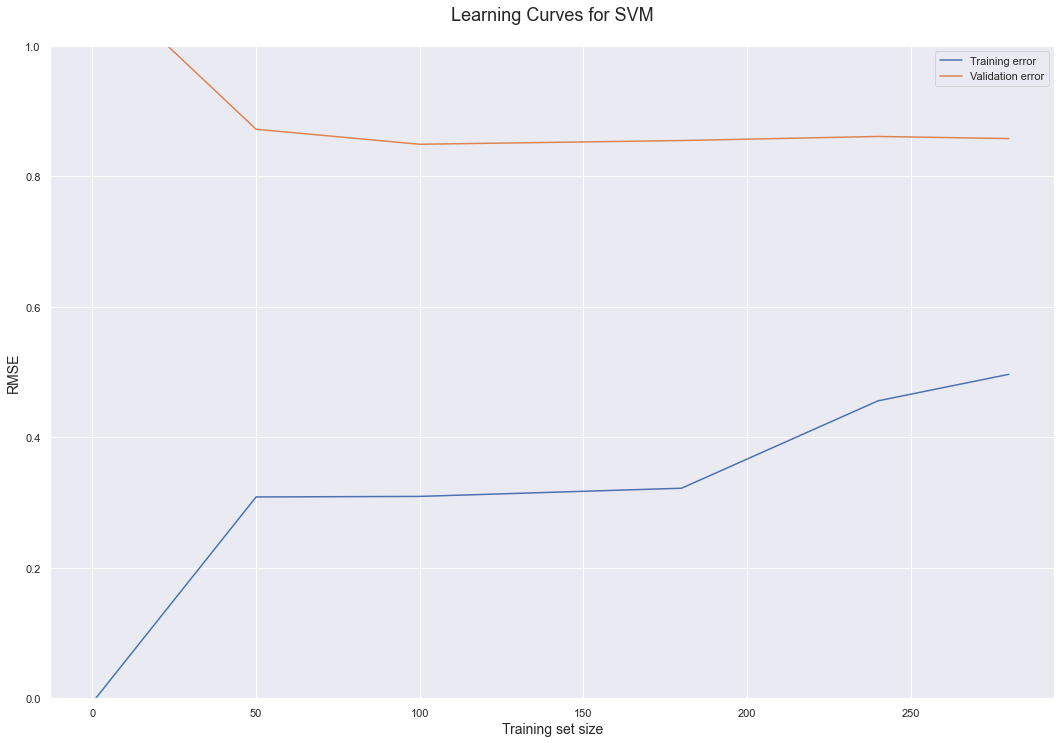

In [134]:

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for SVM', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)


# axes[0].grid()
# axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
# axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1,
#                      color="g")
# axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
# axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")
# axes[0].legend(loc="best")

## some notes on bias and variance

we see here we have a high validation error. This points to a bias problem.
The fact that this is combined with a low training error indicates that it is a low bias problem.
This means that the model fits the training data very well. 

takeaways: 
 - high validation error = bias problem
 - high validation error + low training error = low bias
 - high validation error + high training error = high bias

We also see a large gap between the training and validation sets. The size of this gap determines the variance. The smaller the gap, the less the variance, the larger, the more.

takeaways:
- as bias decreases, variance increases. 
- as bias increases, variance decreases.


this is a great resource for bias and variance. 
http://scott.fortmann-roe.com/docs/BiasVariance.html


this model currently suffers from low bias and high variance. the model is overfitting.
adding more instances is very likely to help because the training and validation errors haven't converged yet.

takeaways:
- making a model less complex increases the bias, decreases variance.
- making a model more complex decreases the bias, increases variance.

you can increase or decrease the number of features to adjust the bias variance relationship.
for this model, making it less complex would help increase the bias. 

ways to adjust complexity:
- using less features (less complex) 
- simpler algorithm hyperparameters (less complex)


## incorporating the graph of fitness into the gridsearch function

first, we'll create the graph for just the one scoring method. 
Then, we'll graph each of the three methods (r2, mae, rmse.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

def gridsearchcv(df):
        
    all_X = df[new_feats]
    all_y = df[target]
    
    #random forest
    depth = [1, 2, 3]
    rf_hyper = dict(n_estimators=[25, 50, 100], min_samples_leaf=[1, 2], max_depth=depth, random_state=[1])
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
        {
            'name': 'rf',
            'estimator': RandomForestRegressor(),
            'hyperparameters': rf_hyper
        },
#         {
#             'name': 'svr',
#             'estimator': SVR(),
#             'hyperparameters': svr_hyper
#         },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]

    
    for i in models:
        grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring='neg_root_mean_squared_error', cv=5)
        grid.fit(all_X, all_y)

        best_params = grid.best_params_
        best_score = abs(grid.best_score_)
        best_estimator = grid.best_estimator_
        scorer = grid.scorer_

        print('best_score:', best_score)
        print('best_params:', best_params)
        print('best_estimator:', best_estimator)
        print('scorer:', scorer)
        
        train_sizes = [1, 50, 100, 180, 240, 280]
        train_sizes, train_scores, validation_scores = learning_curve(
        i['estimator'], all_X, all_y, train_sizes=train_sizes, scoring='neg_root_mean_squared_error', cv=5)

        print('train sizes:', train_sizes)
        print('train_scores:', '\n', '-' * 70)
        print(train_scores)
        print('validation_scores:', '\n', '-' *70)
        print(validation_scores)
    
        train_scores_mean = abs(train_scores).mean(axis=1)
        validation_scores_mean = abs(validation_scores).mean(axis=1)
        
        print('Mean training scores', '\n', train_scores_mean)
        print('-' * 70)
        print('\nMean validation scores', '\n', validation_scores_mean)
        
        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
        plt.ylabel('RMSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        plt.title('Learning Curves for {}'.format(i['estimator']), fontsize = 18, y = 1.03)
        plt.legend()
        plt.ylim(0,1)

    

    
    return best_estimator

best_score: 0.8805740710283183
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
train sizes: [  1  50 100 180 240 280]
train_scores: 
 ----------------------------------------------------------------------
[[-0.         -0.         -0.         -0.         -0.        ]
 [-0.2477862  -0.19028925 -0.1834012  -0.19571408 -0.18861071]
 [-0.22443707 -0.21548086 -0.19902764 -0.19432704 -0.18639206]
 [-0.24453471 -0.23028967 -0.20908    -0.21573131 -0.22243601]
 [-0.29513344 -0.2952132  -0.28985629 -0.28478281 -0.22292095]
 [-0.31498469 -0.32164865 -0.31141383 -0.30727431 -0.24608288]]
validation_scores: 
 ----------------------------------------------------------------------
[[-0.86399009 -0.9258201  -0.81064348 -1.09544512 -1.82443729]
 [-0.63142026 -0.66855708 -0.70333288 -0.95998884 -1.50246797]
 [-0.6

RandomForestRegressor(max_depth=3, random_state=1)

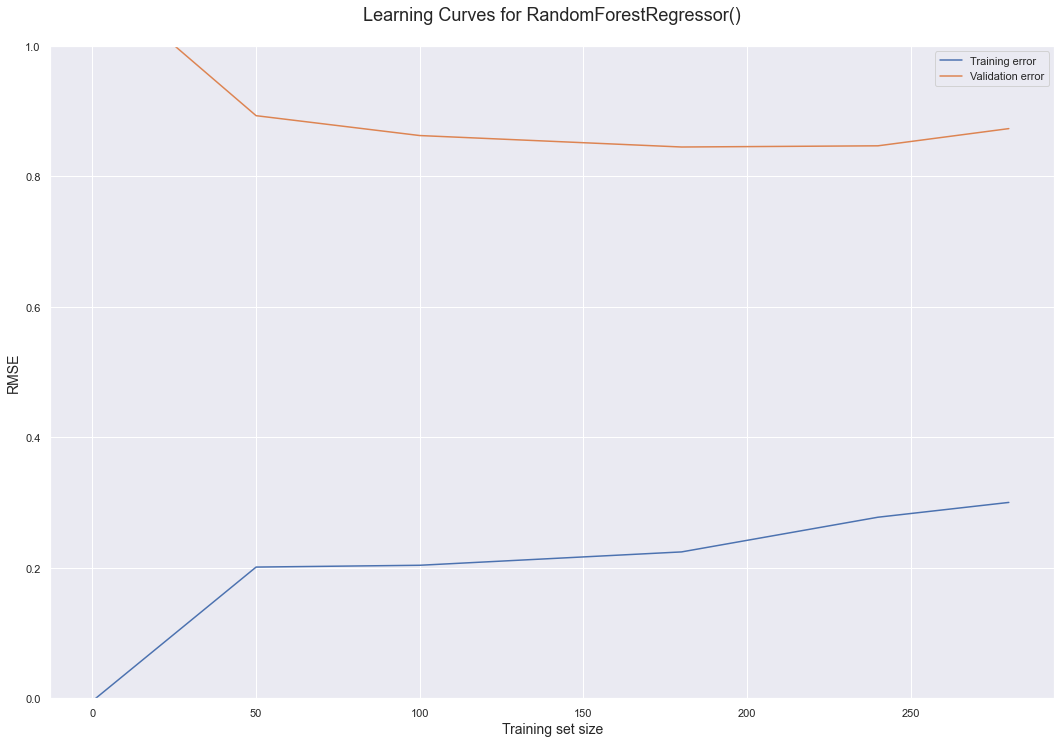

In [136]:
gridsearchcv(full_df)

In [137]:
# all scoring types

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

def gridsearchcv(df):
        
    all_X = df[new_feats]
    all_y = df[target]
    
    #random forest
    depth = [1, 2, 3]
    rf_hyper = dict(n_estimators=[25, 50, 100], min_samples_leaf=[1, 2], max_depth=depth, random_state=[1])
    
    # support vector machine
#     gamma=['scale', 'auto']
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.6, 0.8, 1, 1.2, 1.4, 1.6])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
        {
            'name': 'rf',
            'estimator': RandomForestRegressor(),
            'hyperparameters': rf_hyper
        },
        {
            'name': 'svr',
            'estimator': SVR(),
            'hyperparameters': svr_hyper
        },
#         {
#             'name': 'mlp',
#             'estimator': MLPRegressor(),
#             'hyperparameters': mlp_hyper
#         }
    ]
    
    score_types = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

    for i in models:
        for j in score_types:
            grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring=j, cv=5)
            grid.fit(all_X, all_y)

            best_params = grid.best_params_
            best_score = abs(grid.best_score_)
            best_estimator = grid.best_estimator_
            scorer = grid.scorer_

            print(j, 'best_score:', best_score)
            print('best_params:', best_params)
            print('best_estimator:', best_estimator)
            print('scorer:', scorer)

            train_sizes = [1, 50, 100, 180, 240, 280]
            train_sizes, train_scores, validation_scores = learning_curve(
            i['estimator'], all_X, all_y, train_sizes=train_sizes, scoring=j, cv=5)

            print('train sizes:', train_sizes)
            print('train_scores:', '\n', '-' * 30)
            print(train_scores)
            print('validation_scores:', '\n', '-' *30)
            print(validation_scores)

            train_scores_mean = abs(train_scores).mean(axis=1)
            validation_scores_mean = abs(validation_scores).mean(axis=1)
            
            variance = abs(validation_scores_mean - train_scores_mean)
            
            print('\n')
            print('Mean training scores', '\n', train_scores_mean)
            print('-' * 30)
            print('\nMean validation scores', '\n', validation_scores_mean)
            print('-' * 30, '\n')
            print('variance:', variance)
            
            
            
            plt.figure()
            plt.plot(train_sizes, train_scores_mean, label = 'Training error')
            plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
#             plt.avline(variance)
            plt.ylabel(j, fontsize = 14)
            plt.xlabel('Training set size', fontsize = 14)
            plt.title('Learning Curves for {}'.format(i['estimator']), fontsize = 18, y = 1.03)
            plt.legend()
            plt.ylim(0,1)
            plt.show()
            print('-' * 70, '\n', '\n')
        
    return best_estimator

r2 best_score: 0.27719188855931043
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, random_state=1)
scorer: make_scorer(r2_score)


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/lucasjones/opt/miniconda3/envs/mi

train sizes: [  1  50 100 180 240 280]
train_scores: 
 ------------------------------
[[       nan        nan        nan        nan        nan]
 [0.90698329 0.92897445 0.92629524 0.9341093  0.9324308 ]
 [0.92287243 0.91603856 0.93772236 0.9392122  0.93610388]
 [0.88018894 0.88124166 0.91694415 0.90905912 0.91233957]
 [0.87904734 0.87125564 0.88314339 0.8870846  0.89798109]
 [0.87910885 0.87406634 0.88490082 0.88868536 0.8984545 ]]
validation_scores: 
 ------------------------------
[[-0.40725505 -0.44628099 -0.46630237 -0.6442953  -3.08874405]
 [ 0.27502734  0.27931336 -0.13121403 -0.26044044 -1.80815468]
 [ 0.13284413  0.21816701 -0.0922327  -0.06474776 -1.55957483]
 [ 0.2702586   0.29396419 -0.05397495 -0.20764485 -1.18869591]
 [ 0.21225845  0.22069077  0.04101275 -0.07783949 -1.19286012]
 [ 0.04840352  0.20796109 -0.22215027 -0.09037528 -1.05928278]]


Mean training scores 
 [       nan 0.92575862 0.93038989 0.89995469 0.88370241 0.88504317]
------------------------------

Mean vali

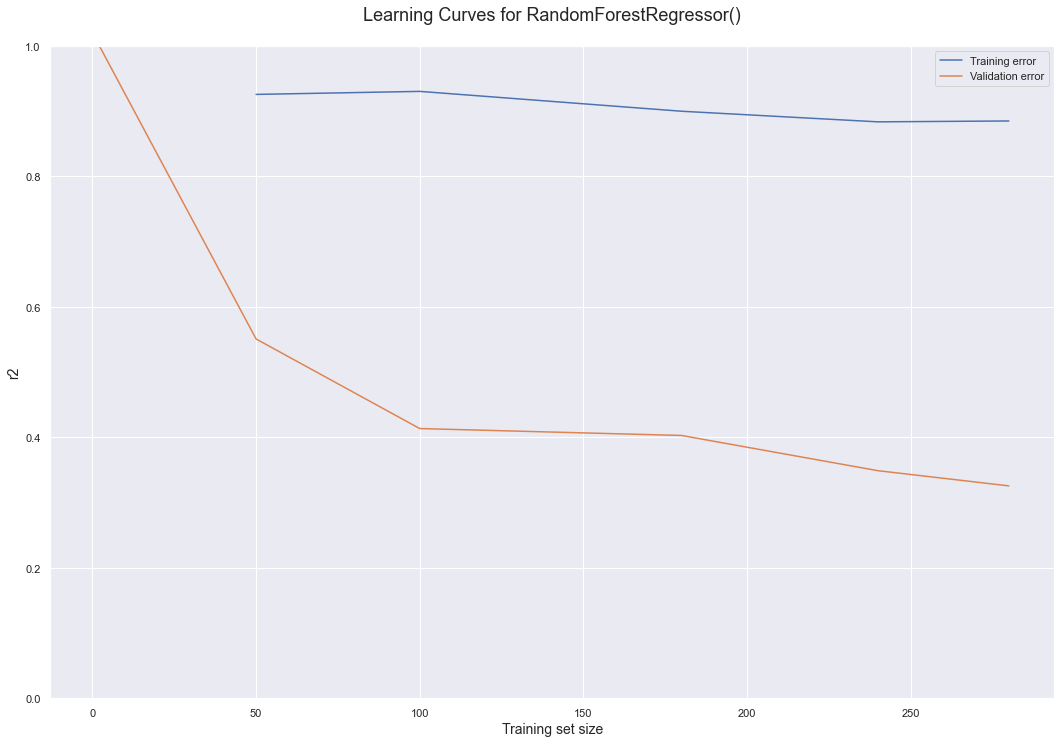

---------------------------------------------------------------------- 
 

neg_root_mean_squared_error best_score: 0.8805740710283183
best_params: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 1}
best_estimator: RandomForestRegressor(max_depth=3, random_state=1)
scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)


KeyboardInterrupt: 

In [138]:
gridsearchcv(full_df)

# further steps

at some point it would be nice to show that, say you have accuracy within 0.4 complications, if you could clearly see a sample of some data being within 0.4 complications of ground truth data. 

if a classification problem seeks to assign a label to something, I could frame this as complication vs no complication
I could then make a multiclass classification problem by wondering which label it might recieve (as opposed to binary, which would just be the above example)

and if classification, would I still use rmse? or just use accuracy measures?

_answer: classification uses accuracy, and regression uses rmse, mse, etc_

right now I'm using regression because it seems appropriate to be assigning a complications number based on the target column having between 0 and 5 complications. 

could this same project be framed as both classification and regression? 

I believe regression is the right choice for this problem because we're interested in finding out how many complications a patient might have. this is more useful information that simply if they will have them or not. 


this is a helpful article: 
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

<a id='Converting_categorical_data_to_numeric'></a>

## Converting Categorical Data to Numeric

In [ ]:
# select_dtypes(include='Object')

In [ ]:
test_df = pd.DataFrame(
    data=[
            [1, 0, 5, 0], 
            [2, 0, 5, 0],
            [3, 0, 5, 0]
        ],
    columns=['first', 'second', 'third', 'fourth']
)
test_df

In [ ]:
# df['A'] = df.apply(lambda x: x['B'] if x['A']==0 else x['A'], axis=1)

In [ ]:
ts = ['first', 'second', 'third']        
# test_df['second'] = test_df.apply(lambda x: x['first'] if x['first'] == 1 else x['second'], axis=1)
test_df['fourth'] = test_df[ts].sum(axis=1)

In [ ]:
test_df

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()